## IA 651 Final Project Code

Kelsey Sheehe & Sarah Weaver

Professor Michael Gilbert

Summer 2024

### Data Prep:

Importing packages necessary to run this code:

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from pca import pca
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


Loading the .csv file into a pandas data frame and looking at a sample of the data frame (soccer_data):

In [2]:
soccer_data = pd.read_csv('nwsl-team-stats.csv')

soccer_data.head()

,team_name,season,games_played,goal_differential,goals,goals_conceded,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
0,Boston Breakers,2016,20,-33,14,47,25.57,8.97,67.38,57.86,47,42.95,77.42
1,Boston Breakers,2017,24,-11,24,35,23.70,12.37,72.53,61.42,48,42.78,73.49
2,Chicago Red Stars,2016,21,3,25,22,21.19,11.79,67.35,57.74,46,48.58,84.32
3,Chicago Red Stars,2017,25,2,33,31,21.08,13.10,69.23,61.52,47,49.60,71.29
4,Chicago Red Stars,2018,25,8,38,30,25.96,13.67,71.63,64.55,51,45.68,67.97


Selecting the columns of interest for the x variables and goal_differential for the y variable:

Not using: Team_name or season

Note: Later in project we will remove goals and goals_conceded because goal_differential is equal to goals - goals_conceded

In [3]:
x_soccer_data = soccer_data[['games_played', 'goals', 'goals_conceded',\
'cross_accuracy', 'goal_conversion_pct', 'pass_pct', 'pass_pct_opposition_half', 'possession_pct', \
'shot_accuracy', 'tackle_success_pct']]

y_soccer_data = soccer_data['goal_differential']

### Understanding the Data:

Looking at the shape of the x_soccer_data:

(10 x variables (8 after final removal of variables) and 59 observations, a relativity small dataset)

In [4]:
print(x_soccer_data.shape)

(59, 10)


Looking at summary statistics of the data:

In [5]:
soccer_data.describe()

,season,games_played,goal_differential,goals,goals_conceded,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2018.949153,23.593220,0.491525,31.254237,30.762712,23.829153,12.804407,73.234068,63.746271,50.033898,46.563220,67.517627
std,2.223881,1.772575,15.054353,10.411521,8.173420,2.720766,3.000926,3.450056,3.976299,3.162093,3.988194,8.643450
min,2016.000000,20.000000,-33.000000,12.000000,17.000000,18.420000,5.430000,62.600000,53.710000,41.000000,35.190000,56.870000
25%,2017.000000,22.000000,-8.000000,23.500000,24.000000,22.285000,10.860000,71.360000,61.480000,48.000000,44.015000,59.660000
50%,2019.000000,24.000000,2.000000,30.000000,31.000000,23.640000,13.100000,72.560000,62.970000,50.000000,46.540000,65.450000
75%,2021.000000,25.000000,10.000000,37.000000,35.000000,25.140000,14.855000,76.325000,65.325000,52.500000,49.030000,73.860000
max,2022.000000,27.000000,41.000000,62.000000,52.000000,33.160000,20.000000,79.990000,72.140000,58.000000,54.020000,86.340000


Creating scatter plots of the different x variables against the response variable, goal_differential:

Looping through each column in x_soccer_data

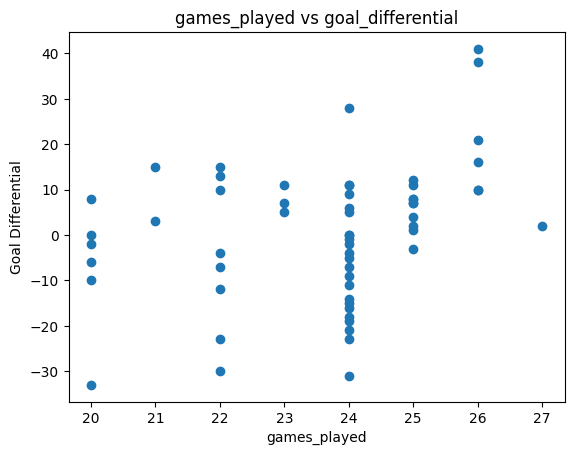

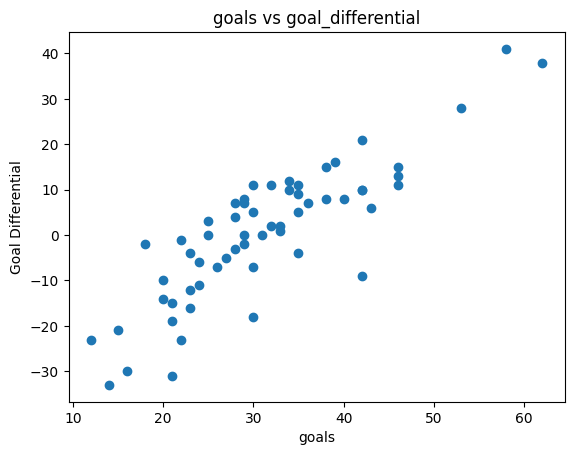

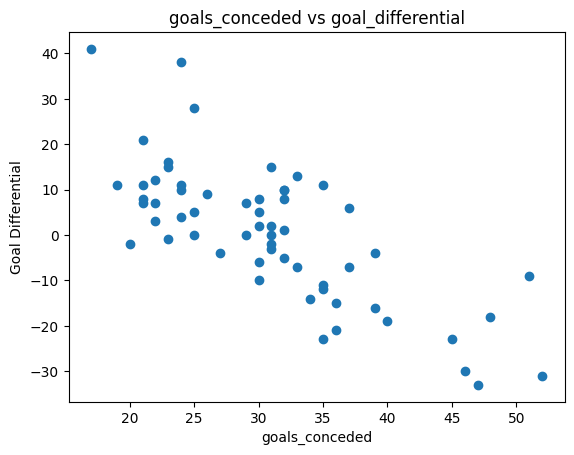

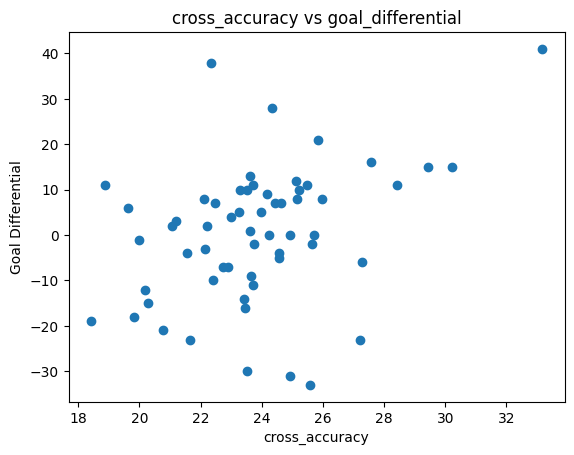

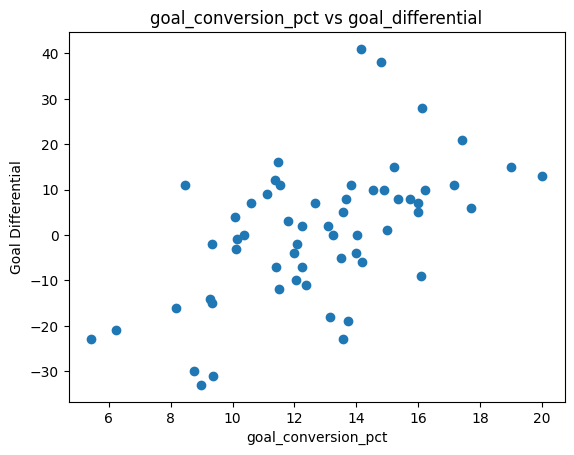

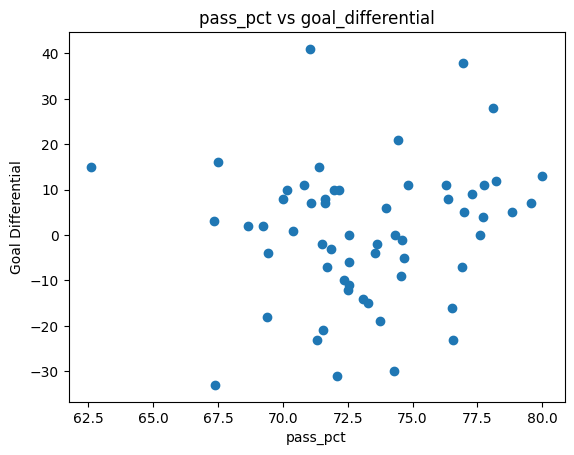

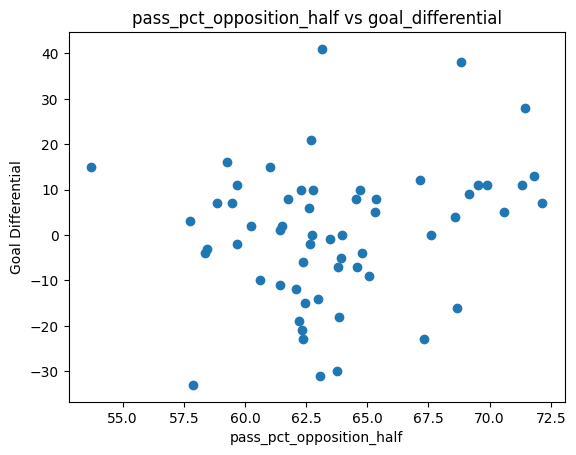

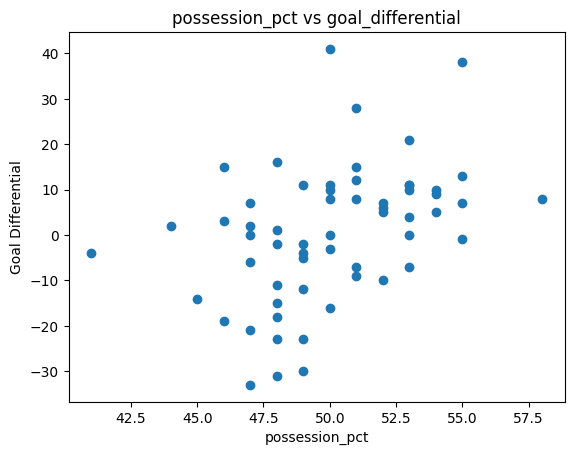

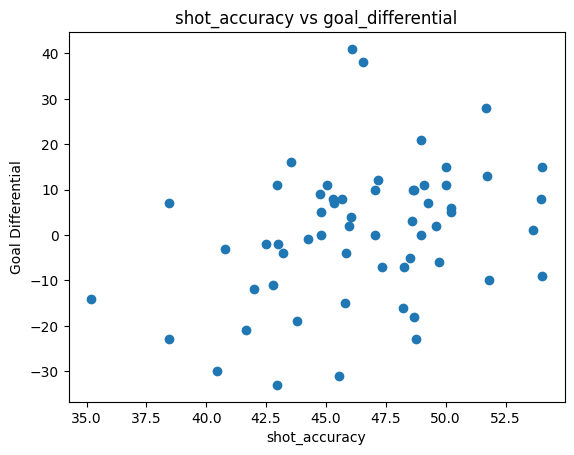

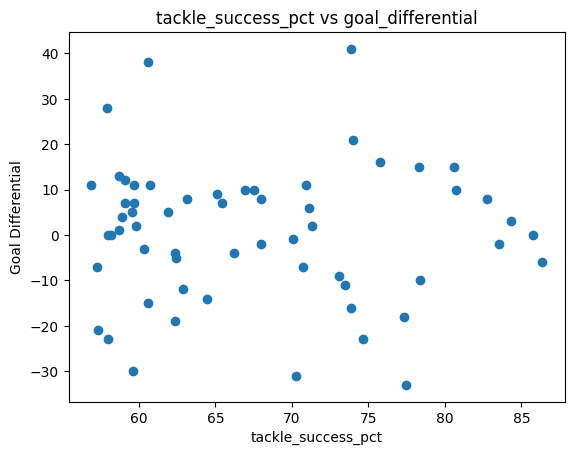

In [6]:
for c in x_soccer_data.columns:
    plt.figure()
    plt.scatter(x_soccer_data[c], y_soccer_data)
    plt.title(f'{c} vs goal_differential')
    plt.xlabel(c)
    plt.ylabel("Goal Differential")
plt.show()


Creating histograms for the columns in the soccer_data data frame:

Looping through each column in soccer_data

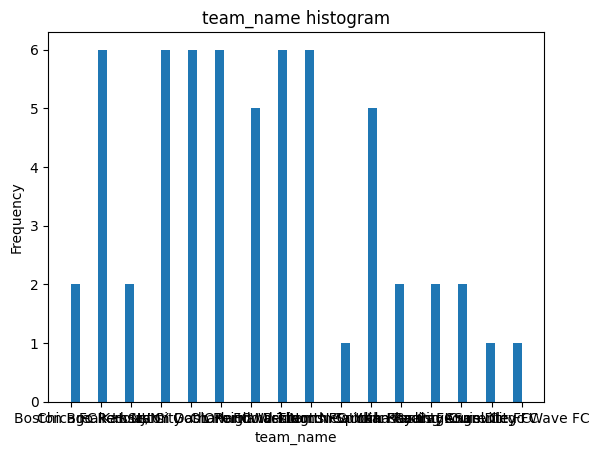

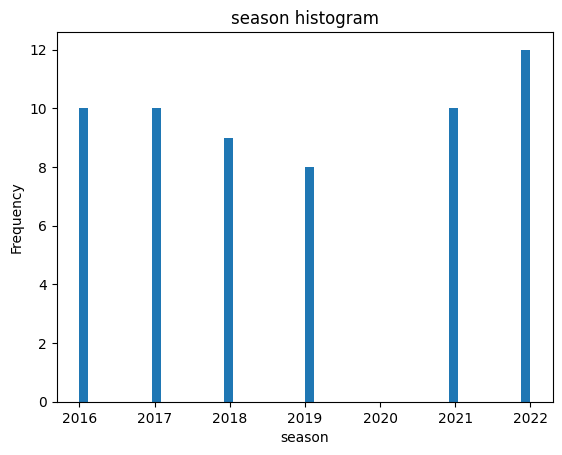

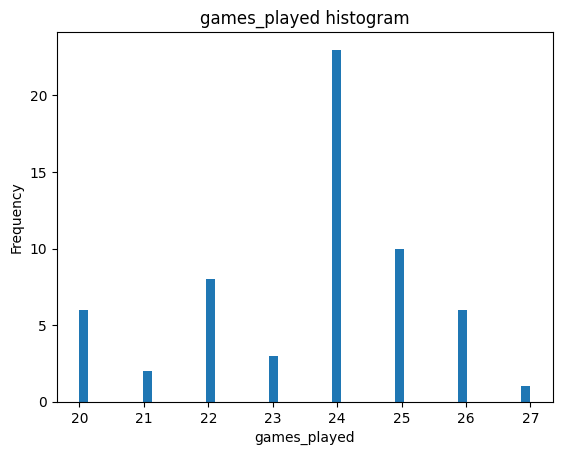

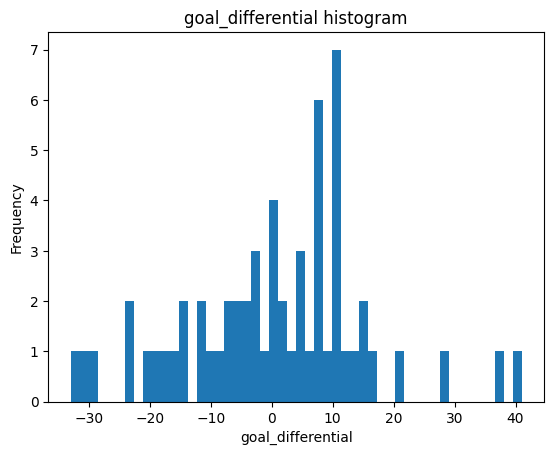

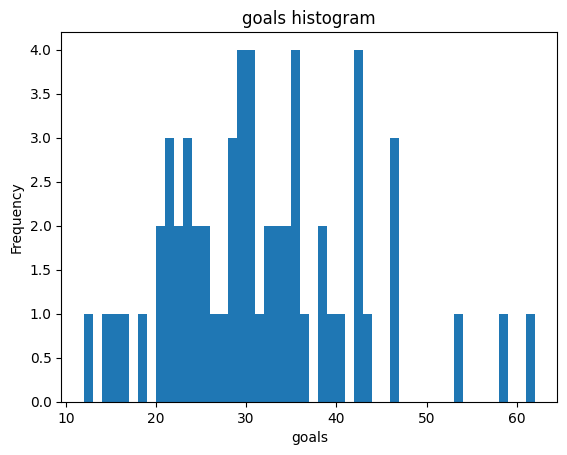

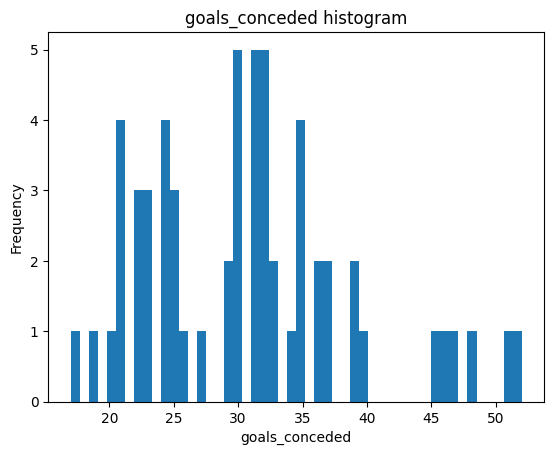

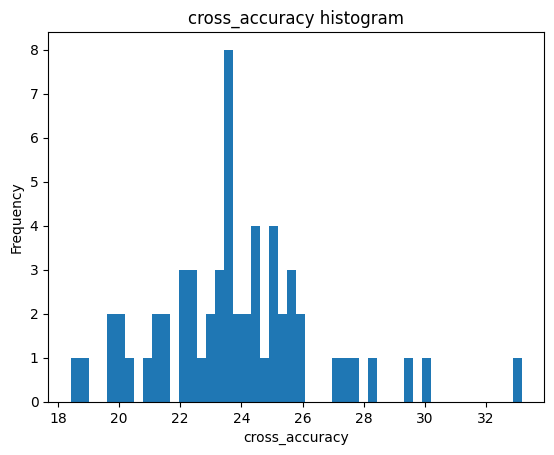

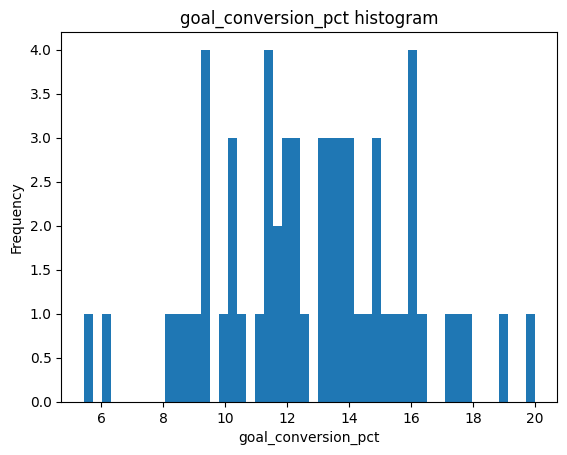

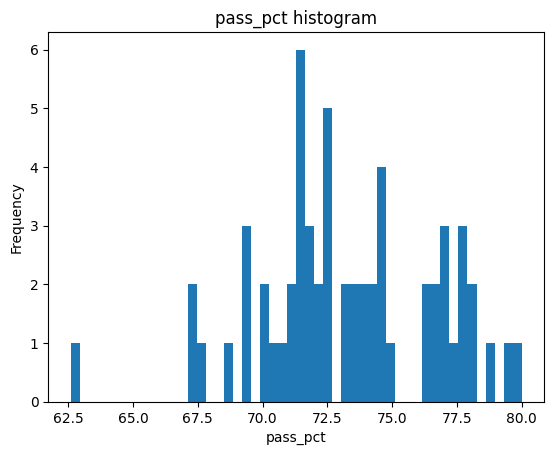

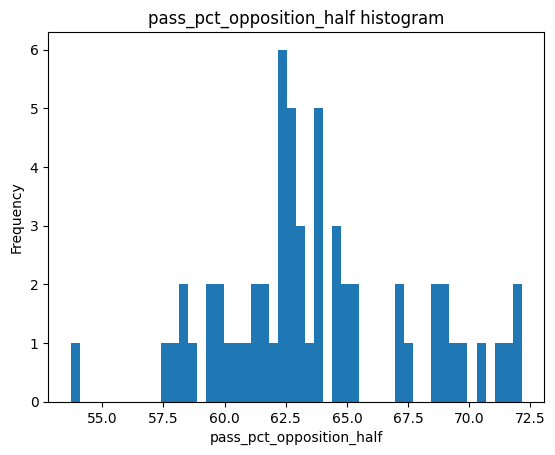

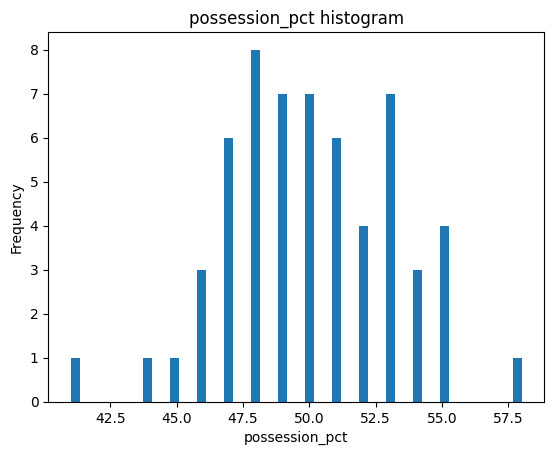

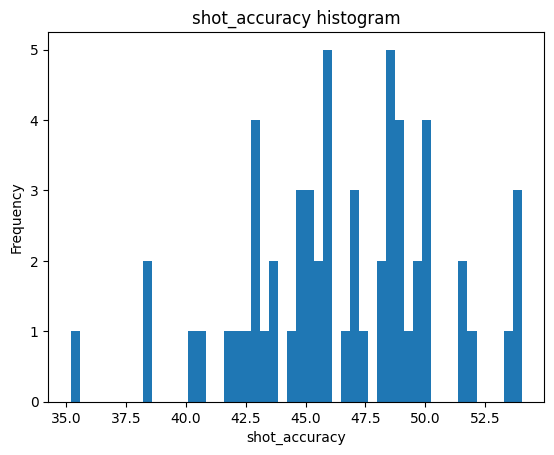

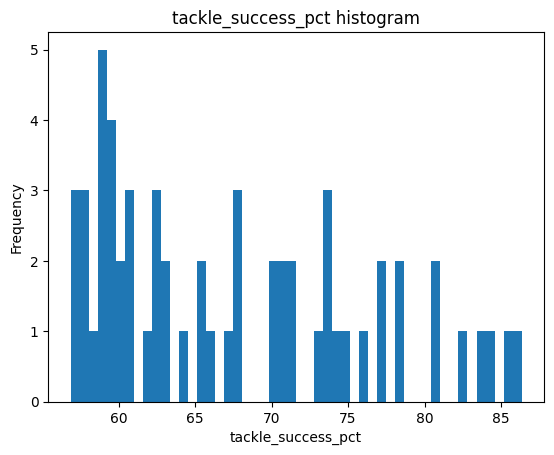

In [7]:
for c in soccer_data.columns:
    plt.figure()
    plt.hist(soccer_data[c], bins = 50)
    plt.title(f'{c} histogram')
    plt.xlabel(c)
    plt.ylabel("Frequency")
plt.show()

Removing goals and goals_conceded columns from the soccer_data frame:

In [8]:
new_soccer_data = soccer_data[['goal_differential', 'games_played',\
'cross_accuracy', 'goal_conversion_pct', 'pass_pct', 'pass_pct_opposition_half', 'possession_pct', \
'shot_accuracy', 'tackle_success_pct']]

new_soccer_data.head()

,goal_differential,games_played,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
0,-33,20,25.57,8.97,67.38,57.86,47,42.95,77.42
1,-11,24,23.70,12.37,72.53,61.42,48,42.78,73.49
2,3,21,21.19,11.79,67.35,57.74,46,48.58,84.32
3,2,25,21.08,13.10,69.23,61.52,47,49.60,71.29
4,8,25,25.96,13.67,71.63,64.55,51,45.68,67.97


Creating a Correlation Matrix:

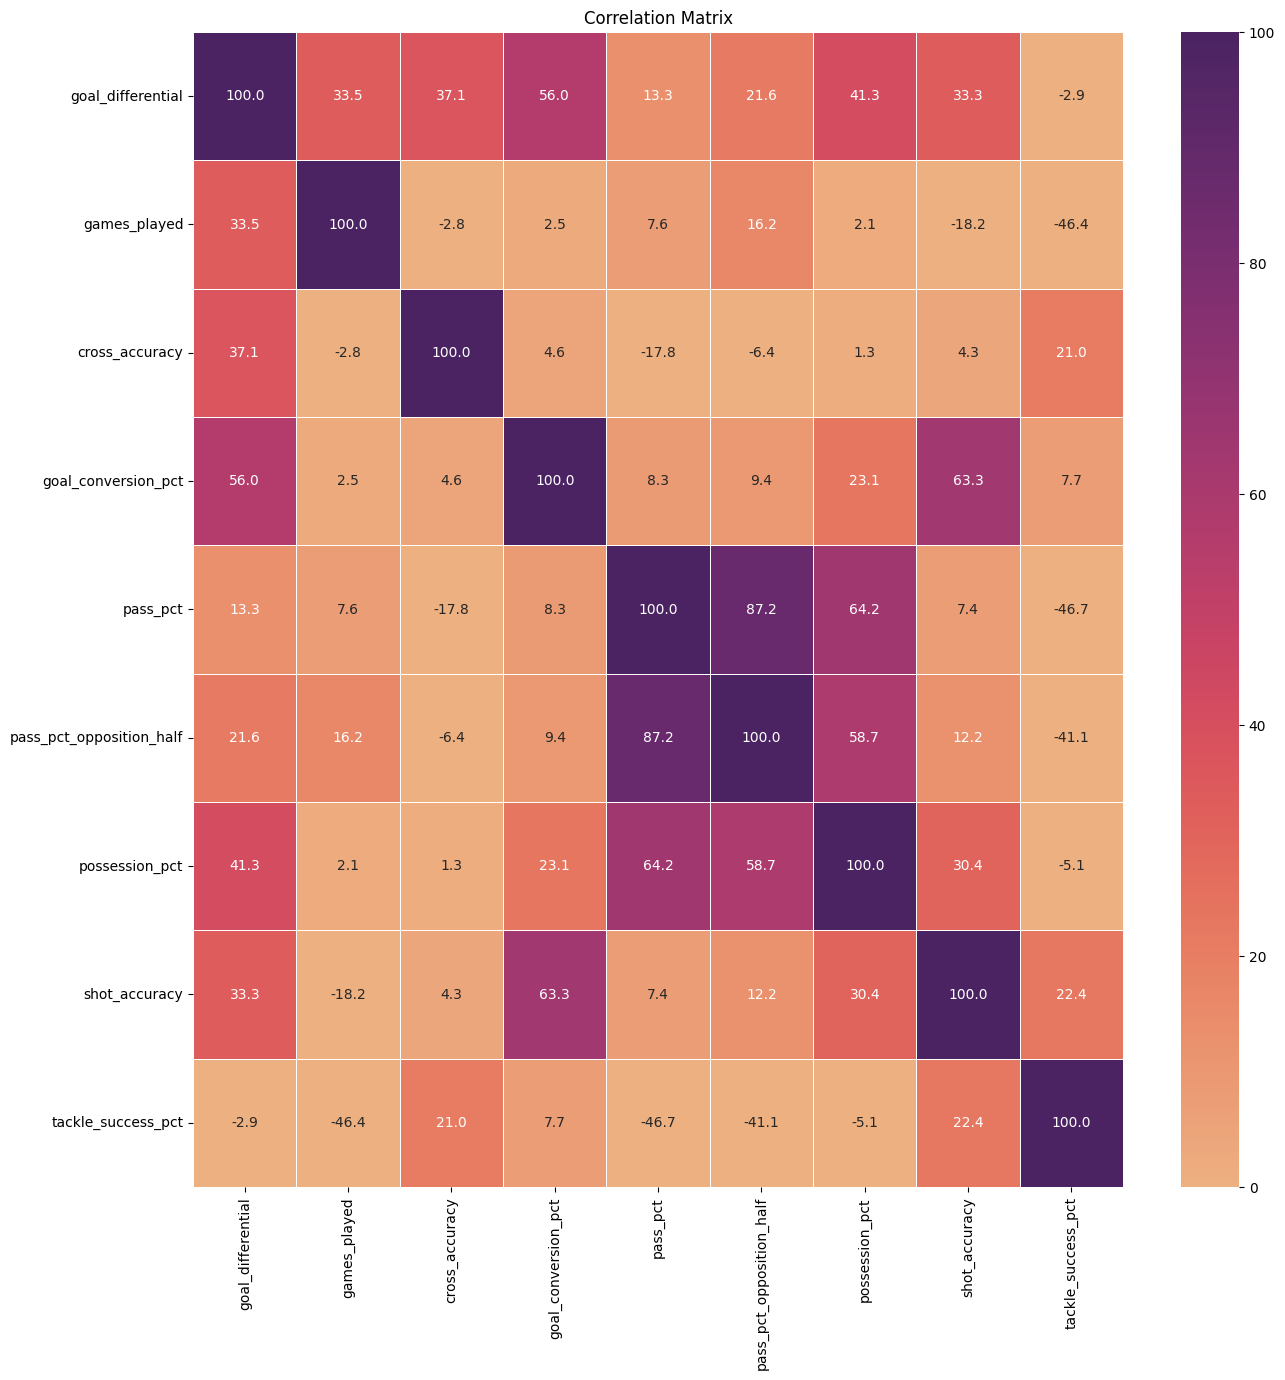

In [9]:
matrix = new_soccer_data.corr() * 100

plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.title('Correlation Matrix')
plt.show()

Creating another visual representation of a correlation matrix (pair plot):

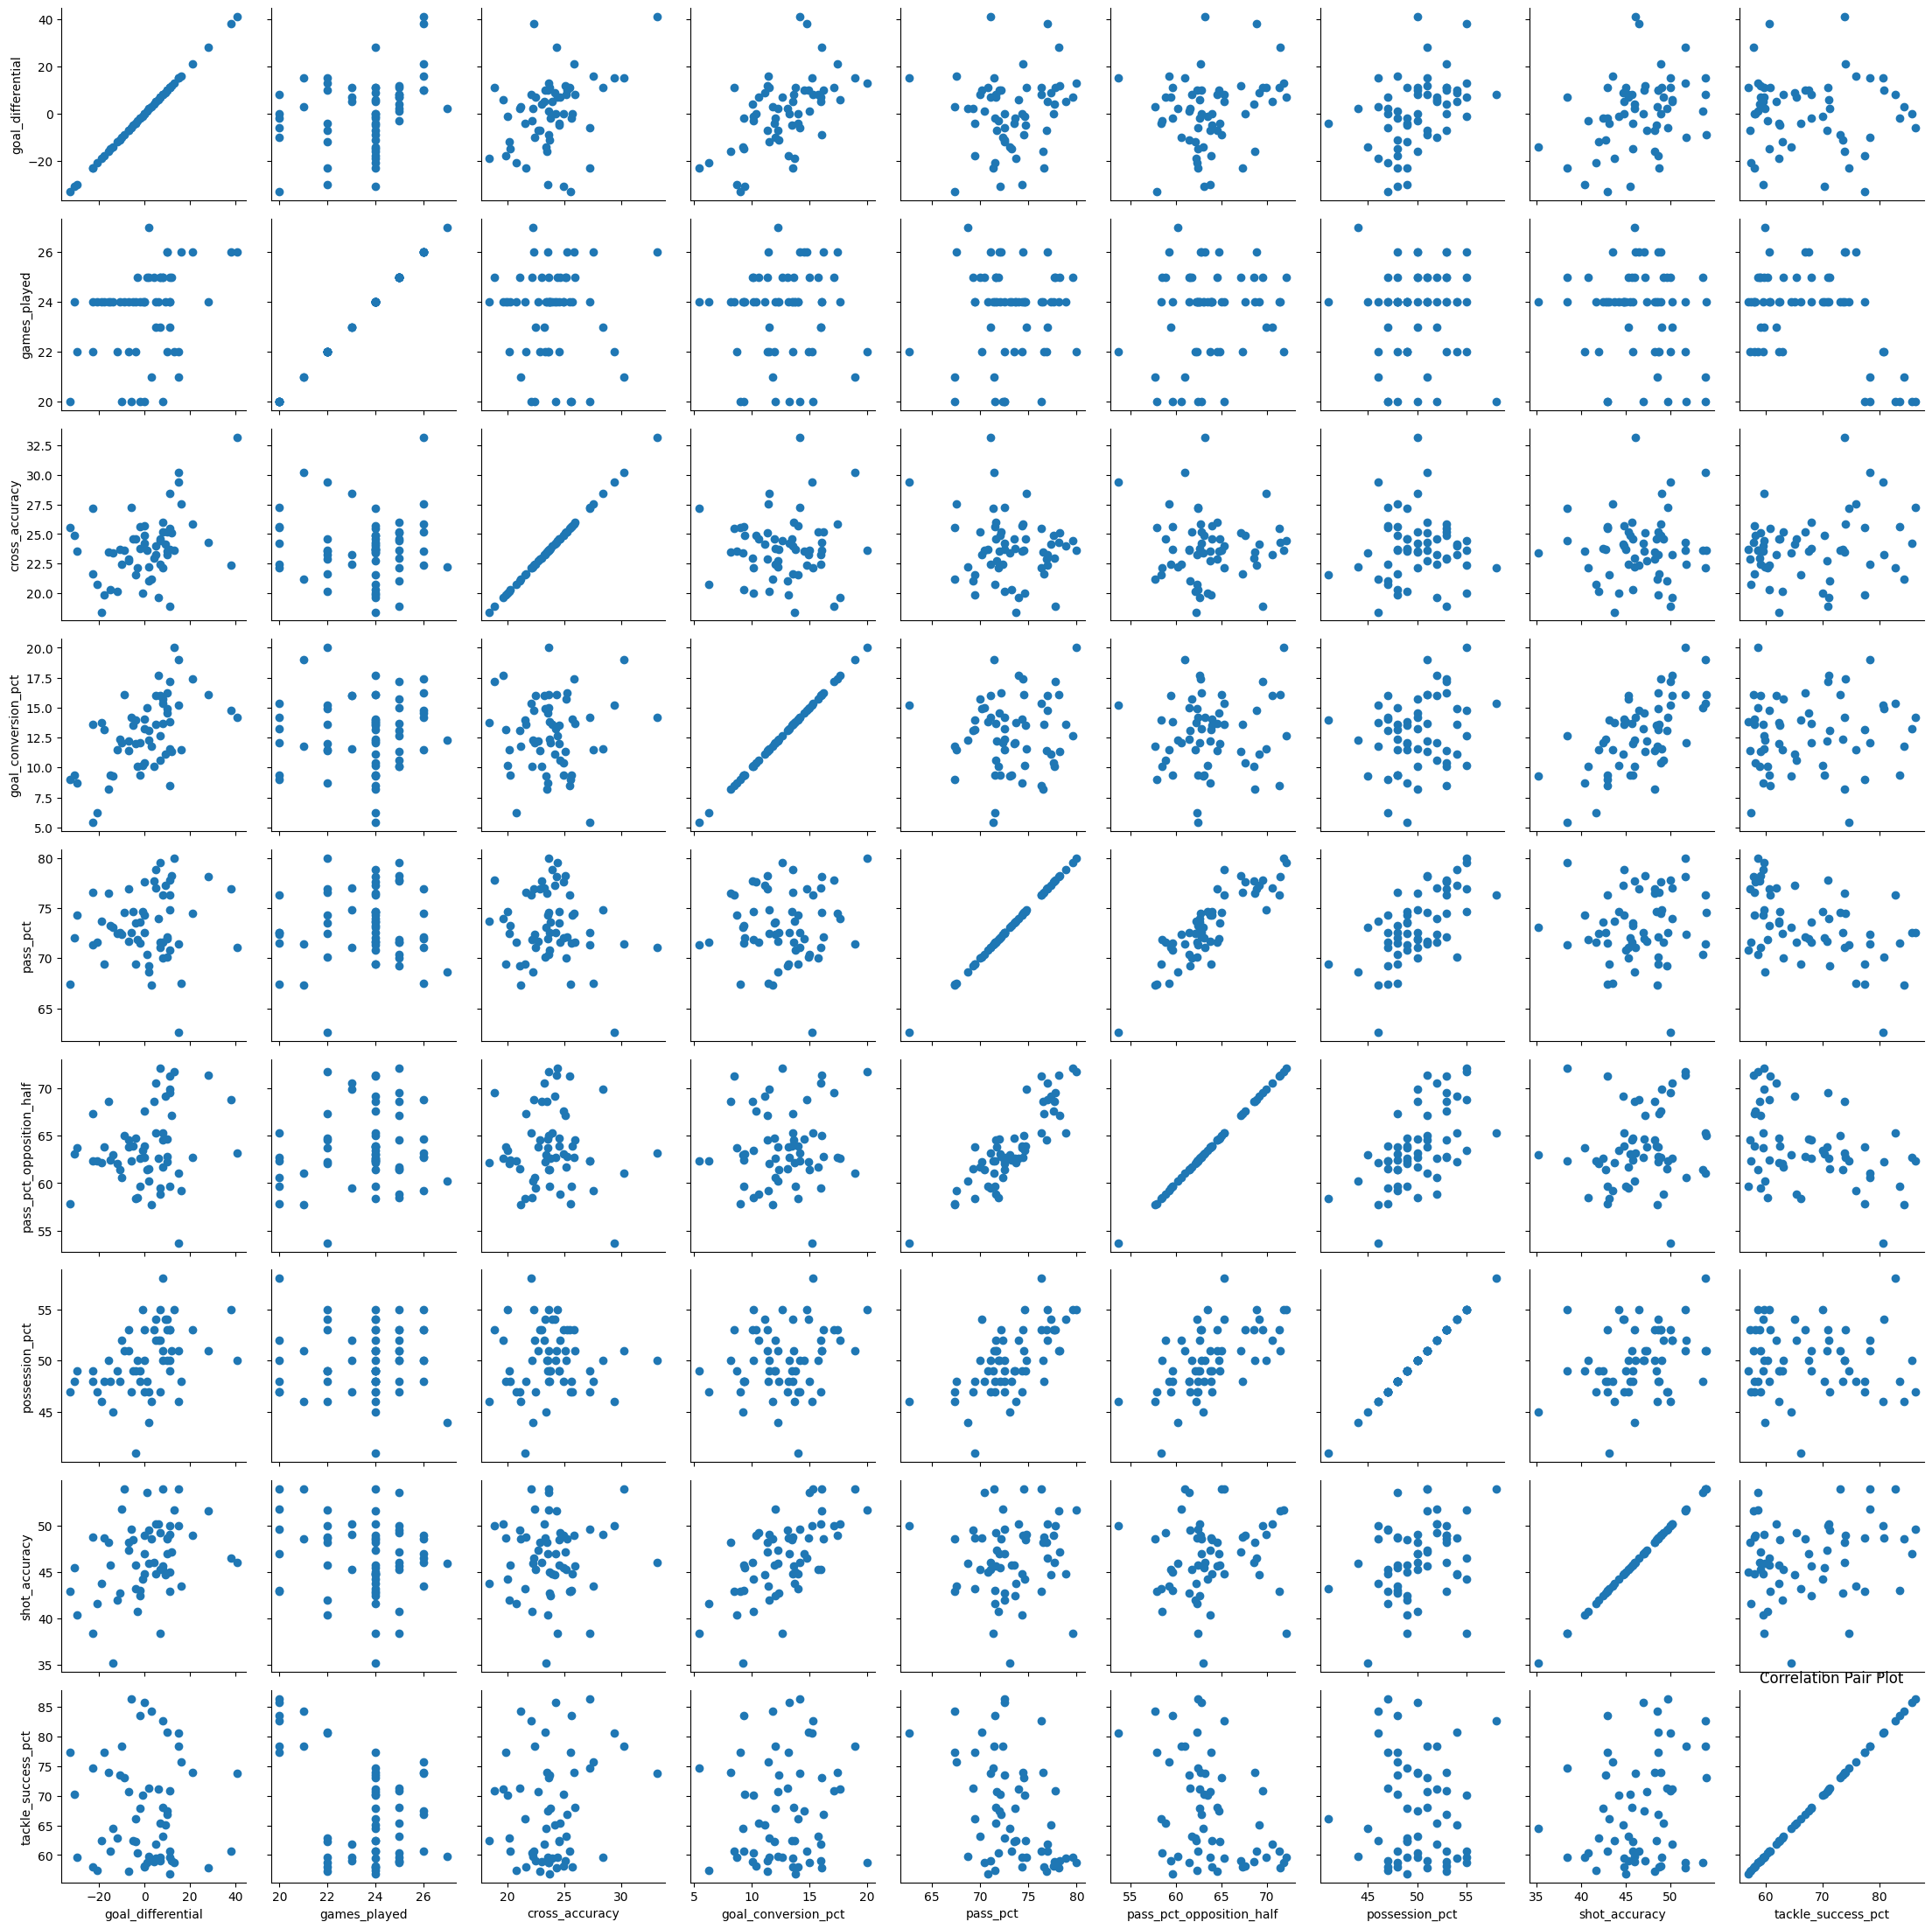

In [10]:
g = sns.PairGrid(new_soccer_data)
g.map(plt.scatter)
plt.title("Correlation Pair Plot")
plt.show()

### Scaling Data:

Creating X and y:

Not using (for X): team_name, season, goals, or goals_conceded

In [11]:
X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = y_soccer_data

Using StandardScaler on the X data frame and creating a new data frame with those scaled values:

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)

scaled_data_df.head()

,games_played,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
0,-2.044519,0.645329,-1.288709,-1.711369,-1.493046,-0.967695,-0.913756,1.155485
1,0.231455,-0.047877,-0.146000,-0.205826,-0.590056,-0.648734,-0.956748,0.696902
2,-1.475526,-0.978330,-0.340933,-1.720139,-1.523484,-1.286656,0.510028,1.960629
3,0.800449,-1.019107,0.099346,-1.170543,-0.564691,-0.967695,0.767979,0.440189
4,0.800449,0.789902,0.290918,-0.468931,0.203865,0.308149,-0.223360,0.052786


### Linear Regression

Fitting a linear regression on the scaled data:

Grating a train test split of 80:20

Outputting each feature's Slope, Intercept, and MSE

In [13]:
for col in scaled_data_df.columns:
    X = scaled_data_df[[col]]
    y = y_soccer_data
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    linear_regression = LinearRegression()
    reg = linear_regression.fit(X_train,y_train)
    
    y_pred = linear_regression.predict(X_test)
    
    MSE = mean_squared_error(y_test,y_pred)
    
    print(f'Feature: {col} \n Slope: {reg.coef_[0]} \n Intercept: {reg.intercept_} \n Mean Squared Error: {MSE} \n ')

Feature: games_played 
 Slope: 3.239550624855535 
 Intercept: 0.5710852517075659 
 Mean Squared Error: 286.62714877107004 
 
Feature: cross_accuracy 
 Slope: 3.202459249277016 
 Intercept: 0.4654590848623572 
 Mean Squared Error: 261.77453329224016 
 
Feature: goal_conversion_pct 
 Slope: 7.002452039983725 
 Intercept: -0.08534455399145413 
 Mean Squared Error: 207.15565593040034 
 
Feature: pass_pct 
 Slope: 2.717429038568445 
 Intercept: -0.07788673346689057 
 Mean Squared Error: 364.0893350716194 
 
Feature: pass_pct_opposition_half 
 Slope: 3.7356333981648695 
 Intercept: -0.19010077263594233 
 Mean Squared Error: 357.17641808210493 
 
Feature: possession_pct 
 Slope: 6.600571495678313 
 Intercept: -0.5288842162613081 
 Mean Squared Error: 330.6455545141905 
 
Feature: shot_accuracy 
 Slope: 3.8881100609064667 
 Intercept: 0.11492861617881348 
 Mean Squared Error: 304.8185490470135 
 
Feature: tackle_success_pct 
 Slope: -1.9175170515167377 
 Intercept: 0.33962348341308035 
 Mean S

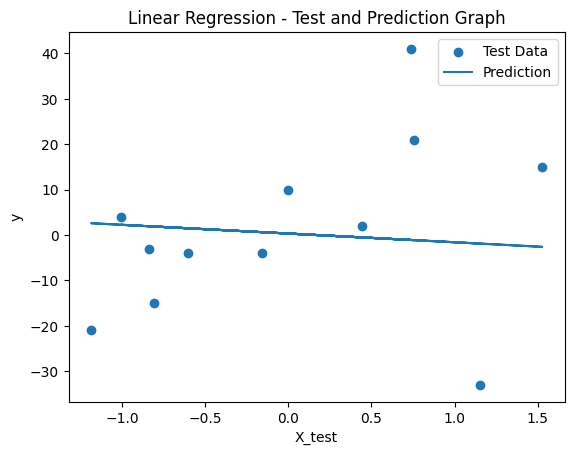

In [14]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

plt.xlabel("X_test")
plt.ylabel("y")
plt.legend(['Test Data','Prediction'])
plt.title("Linear Regression - Test and Prediction Graph")
plt.show()

OLS Regression Results:

In [15]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      goal_differential   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.04719
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.829
Time:                        12:43:02   Log-Likelihood:                -243.18
No. Observations:                  59   AIC:                             490.4
Df Residuals:                      57   BIC:                             494.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.4915      1

Obtaining the Training and Testing MSE Values:

In [16]:
y_test_pred = linear_regression.predict(X_test)
y_train_pred = linear_regression.predict(X_train)

mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

Training MSE: 185.25952161895665
Test MSE: 379.8924941977164


Obtaining the Training and Testing R Squared Values:

In [17]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print(f'Training R Squared: {r2_train}')
print(f'Test R Squared: {r2_test}')

Training R Squared: 0.020623652032577433
Test R Squared: -0.07291111782358617


### SVR

Using a stander scaler to scale training and testing data:

In [18]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(
    X_test), columns=X_train.columns, index=X_test.index)

Performing initial SVR and using a C value of 1 and a gamma of 1:

(Will perform a grid search to find optimal C and gamma later)

In [19]:
model = SVR(kernel = 'rbf', C=1, gamma=1)
model.fit(X_train_scaled, y_train)


y_test_pred_SVR = model.predict(X_test_scaled)
y_train_pred_SVR = model.predict(X_train_scaled)

Obtaining the Training and Testing MSE Values:

In [20]:
mse_test_SVR = mean_squared_error(y_test, y_test_pred_SVR)
mse_train_SVR = mean_squared_error(y_train, y_train_pred_SVR)

print(f'Training MSE SVR: {mse_train_SVR}')
print(f'Test MSE SVR: {mse_test_SVR}')

Training MSE SVR: 180.4911085095019
Test MSE SVR: 394.6460956384064


Obtaining the Training and Testing R Squared Values:

In [21]:
r2_train_SVR = r2_score(y_train,y_train_pred_SVR)
r2_test_SVR = r2_score(y_test,y_test_pred_SVR)

print(f'Training R Squared SVR: {r2_train_SVR}')
print(f'Test R Squared SVR: {r2_test_SVR}')

Training R Squared SVR: 0.04583191650355667
Test R Squared SVR: -0.11457896663719258


### SVR with Grid Search

Performing a grid search to find the best C and gamma parameters:

In [22]:
folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVR()

params = {'C': [0.1, 1, 10, 100, 1000, 10000, 20000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='neg_mean_squared_error', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)

print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Negative MSE: -191.01489277115664
Best Parameters: {'C': 100, 'gamma': 0.1}


In [23]:
c_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024088,0.024714,0.006408,0.004523,0.1,1.0000,"{'C': 0.1, 'gamma': 1}",-236.109446,-182.453043,-333.256947,...,-203.488757,81.968334,17,-198.992511,-188.692753,-163.518081,-189.810858,-217.415769,-191.685995,17.443127
1,0.014876,0.015468,0.005066,0.004167,0.1,0.1000,"{'C': 0.1, 'gamma': 0.1}",-239.534450,-181.137397,-336.812076,...,-204.528592,83.317745,21,-200.549865,-190.897985,-165.269084,-191.468110,-217.789278,-193.194864,17.012276
2,0.006994,0.003436,0.003233,0.000702,0.1,0.0100,"{'C': 0.1, 'gamma': 0.01}",-241.240269,-181.011752,-338.255938,...,-205.164266,83.862008,24,-201.305762,-191.380048,-166.034058,-192.192654,-217.832982,-193.749101,16.812466
3,0.007751,0.002949,0.006584,0.004234,0.1,0.0010,"{'C': 0.1, 'gamma': 0.001}",-241.464359,-181.009921,-338.449930,...,-205.256024,83.931418,26,-201.413728,-191.431310,-166.133372,-192.291283,-217.841130,-193.822165,16.788517
4,0.007640,0.004198,0.004379,0.000769,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",-241.487429,-181.009989,-338.469986,...,-205.265598,83.938538,27,-201.424963,-191.436455,-166.143597,-192.301493,-217.842007,-193.829703,16.786079


Performing SVR with the optimal C and gamma:

In [24]:
model_scaled = SVR(gamma=0.1, C=100)
model_scaled.fit(X_train_scaled, y_train)

y_train_pred_SVR = model_scaled.predict(X_train_scaled)
y_test_pred_SVR = model_scaled.predict(X_test_scaled)

Obtaining the Training and Testing MSE Values (C = 100, gamma = 0.1):

In [25]:
mse_test_SVR = mean_squared_error(y_test, y_test_pred_SVR)
mse_train_SVR = mean_squared_error(y_train, y_train_pred_SVR)

print(f'Training MSE SVR: {mse_train_SVR}')
print(f'Test MSE SVR: {mse_test_SVR}')

Training MSE SVR: 186.17495008595955
Test MSE SVR: 437.562009145412


Obtaining the Training and Testing R Squared Values (C = 100, gamma = 0.1):

In [26]:
r2_train_SVR = r2_score(y_train,y_train_pred_SVR)
r2_test_SVR = r2_score(y_test,y_test_pred_SVR)

print(f'Training R Squared SVR: {r2_train_SVR}')
print(f'Test R Squared SVR: {r2_test_SVR}')

Training R Squared SVR: 0.01578423011782837
Test R Squared SVR: -0.23578420611017203


### SVR with Pipeline

Performing SVR with a pipeline:

In [27]:
scaler = StandardScaler()
SVR_pipeline = Pipeline(steps=[('scaler',StandardScaler()),('classifier',SVR())])

params = {'classifier__C':[0.1, 1, 10, 100, 1000, 10000, 20000],
          'classifier__gamma':[1, 0.1, 0.01, 0.001, 0.0001]}

c_opt = GridSearchCV(estimator=SVR_pipeline, param_grid=params,
                     scoring='neg_mean_squared_error', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)
c_results.to_csv('test.csv')

print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits
Negative MSE: -191.05346036835925
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.1}


Using the best C and gamma parameters:

In [28]:
model_scaled = SVR(C=100, gamma = 0.1)
model_scaled.fit(X_train, y_train)
y_train_pred_SVR_2 = model_scaled.predict(X_train)
y_test_pred_SVR_2 = model_scaled.predict(X_test)

Obtaining the Training and Testing MSE Values (C = 100, gamma = 0.1):

In [29]:
mse_test_SVR_2 = mean_squared_error(y_test, y_test_pred_SVR_2)
mse_train_SVR_2 = mean_squared_error(y_train, y_train_pred_SVR_2)

print(f'Training MSE SVR: {mse_train_SVR_2}')
print(f'Test MSE SVR: {mse_test_SVR_2}')

Training MSE SVR: 186.18807154272227
Test MSE SVR: 438.19020105537635


Obtaining the Training and Testing R Squared Values (C = 100, gamma = 0.1):

In [30]:
r2_train_SVR_2 = r2_score(y_train,y_train_pred_SVR_2)
r2_test_SVR_2 = r2_score(y_test,y_test_pred_SVR_2)

print(f'Training R Squared SVR: {r2_train_SVR_2}')
print(f'Test R Squared SVR: {r2_test_SVR_2}')

Training R Squared SVR: 0.015714863403005985
Test R Squared SVR: -0.23755837668374724


### Decision Tree Regressor

In [31]:
model = DecisionTreeRegressor(max_depth= 2)

X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = y_soccer_data

model.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [32]:
model = DecisionTreeRegressor()

params = {'max_depth': [2,3,4,5,10,50,100]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='neg_mean_squared_error', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)

print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Negative MSE: -256.2625291562097
Best Parameters: {'max_depth': 2}


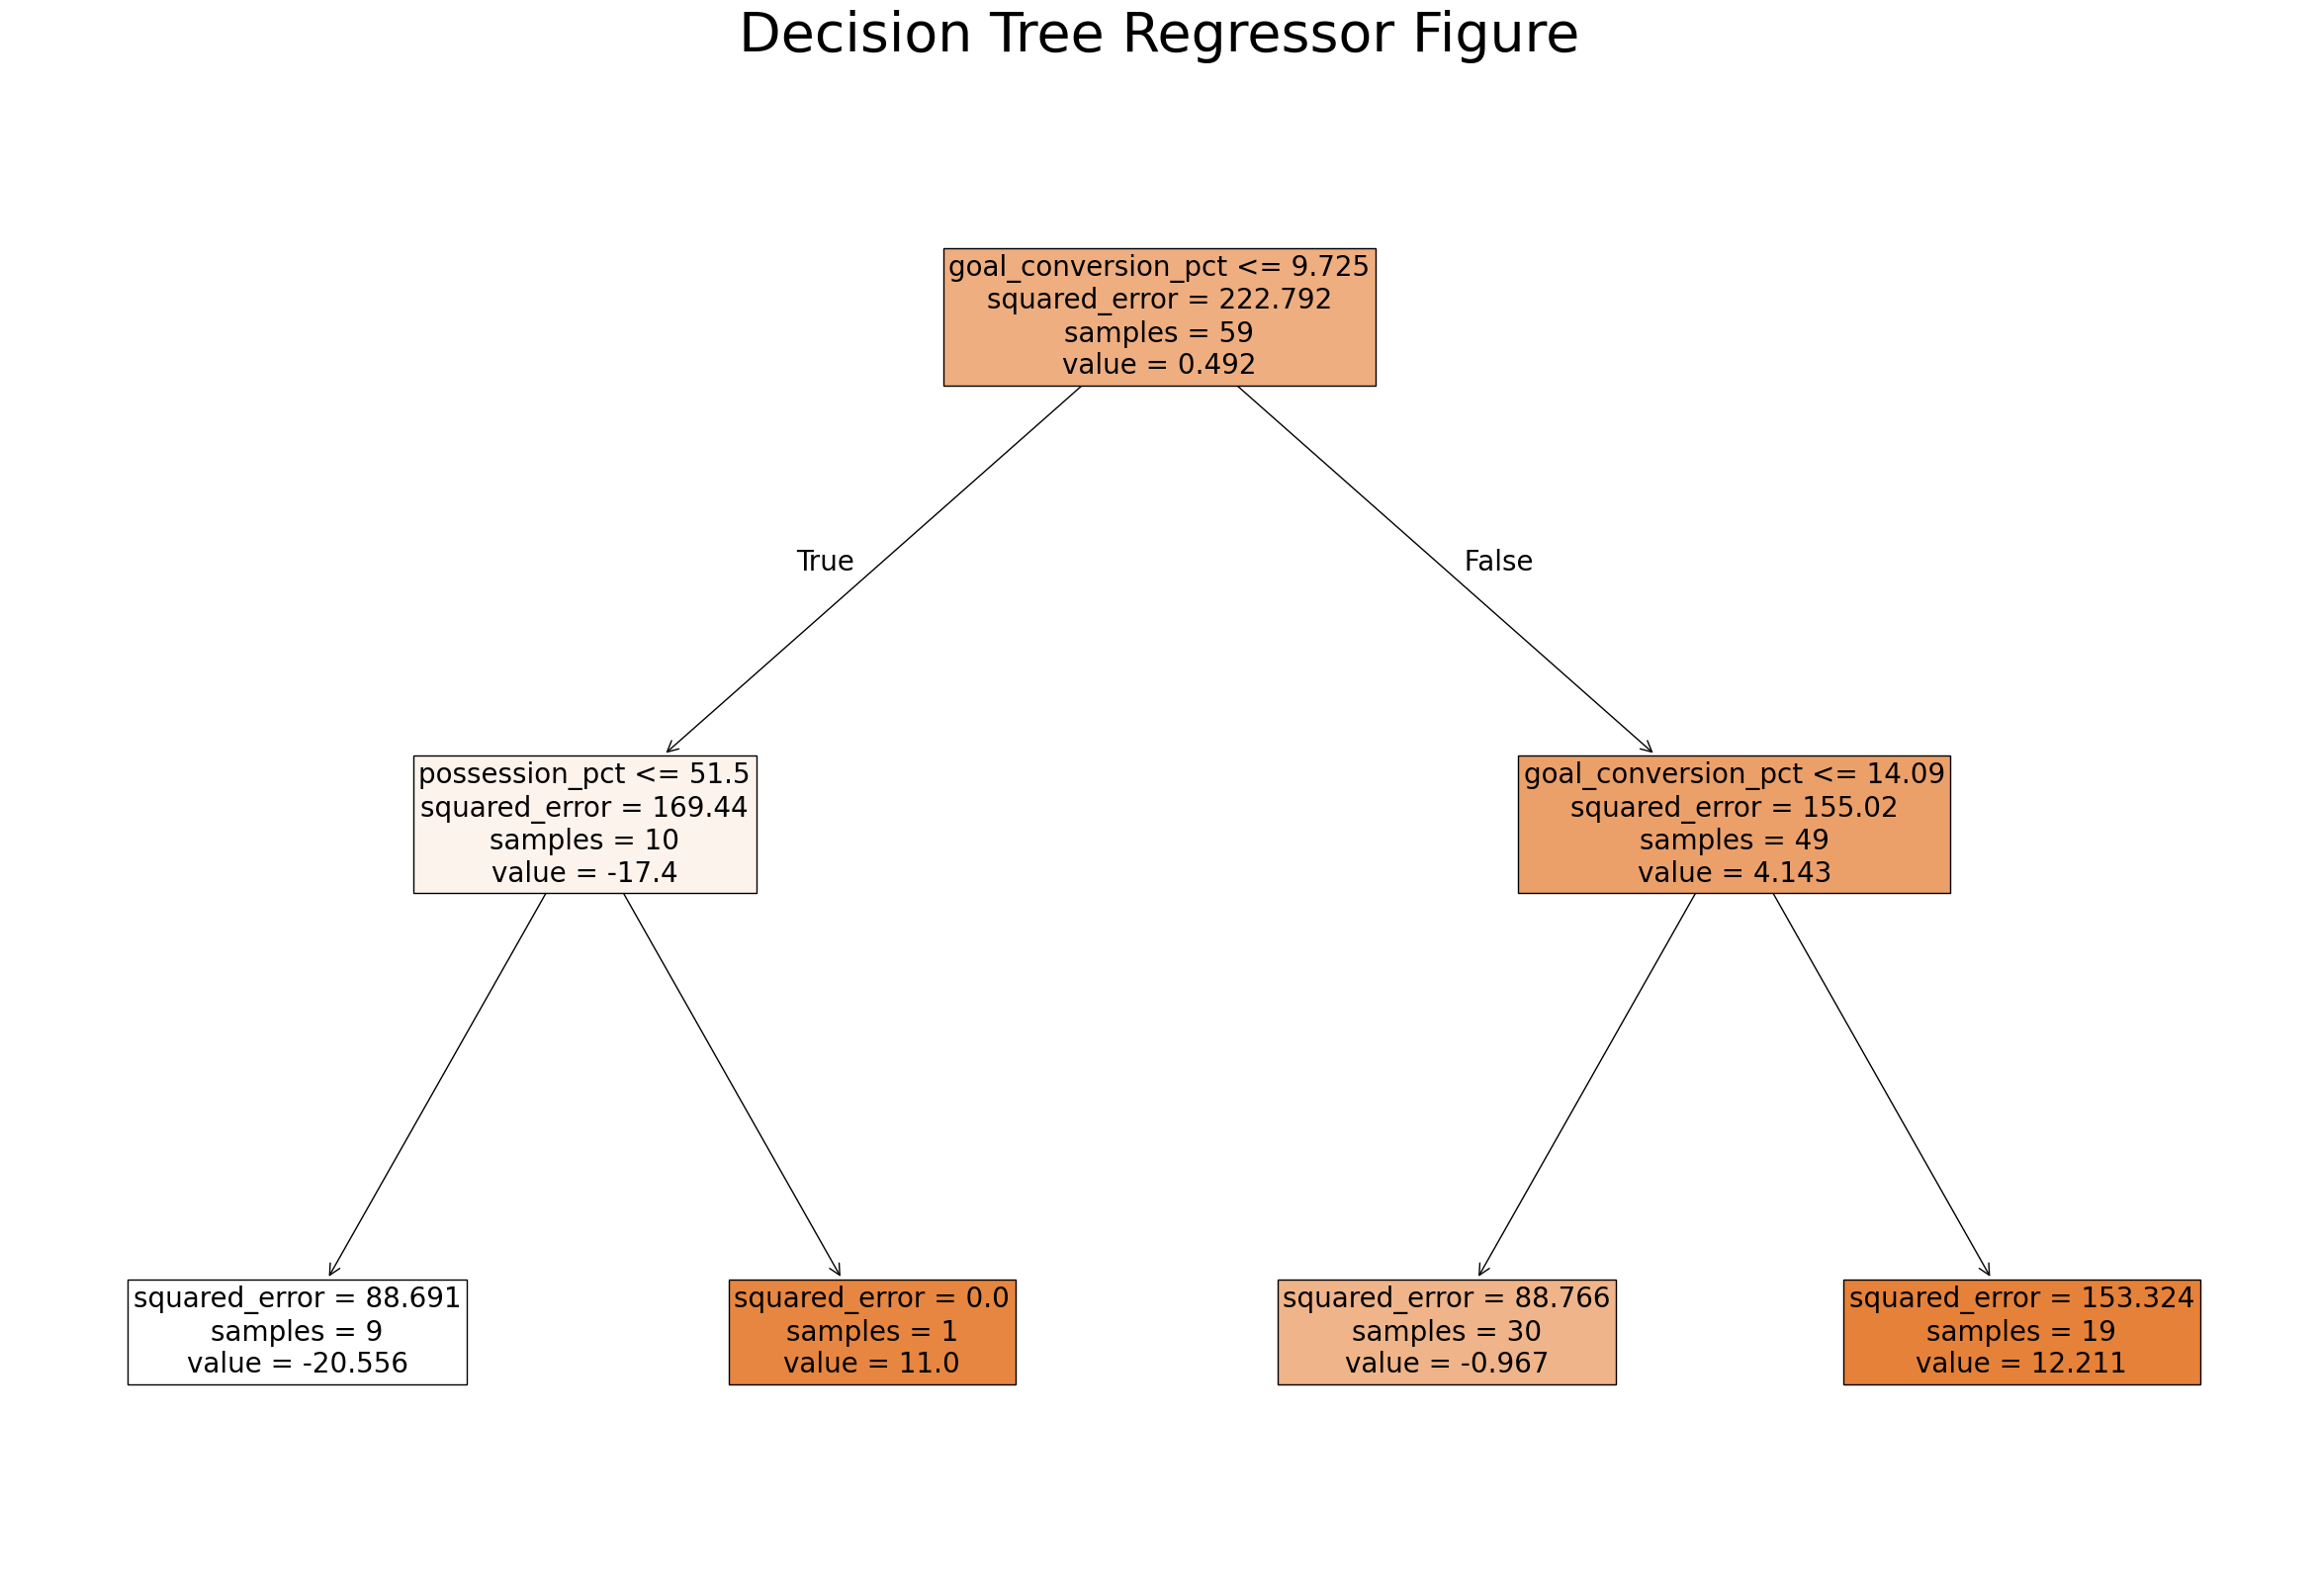

In [33]:
model = DecisionTreeRegressor(max_depth= 2)

X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = y_soccer_data

model.fit(X,y)

plt.figure(figsize=(30,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,
                   filled=True,
                   fontsize=20)
plt.title("Decision Tree Regressor Figure", fontsize = 40)
plt.show()

### Random Forest Regressor

In [34]:
#regr = RandomForestRegressor(max_depth=4, random_state=42)
#regr.fit(X, y)

In [35]:
model = RandomForestRegressor()
model.fit(X, y)

params = {'max_depth': [2,3,4,5,10,50,100],
          'n_estimators': [5,10,20,100,500,1000]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='neg_mean_squared_error', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)

print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Negative MSE: -224.2180686896093
Best Parameters: {'max_depth': 2, 'n_estimators': 20}


In [36]:
RandomForestRegressor(...)

RandomForestRegressor(n_estimators=Ellipsis)

In [37]:
model = RandomForestRegressor(n_estimators = 10, max_depth = 2)
model.fit(X,y)

RandomForestRegressor(max_depth=2, n_estimators=10)

In [38]:
tree_to_plot = model.estimators_[0]

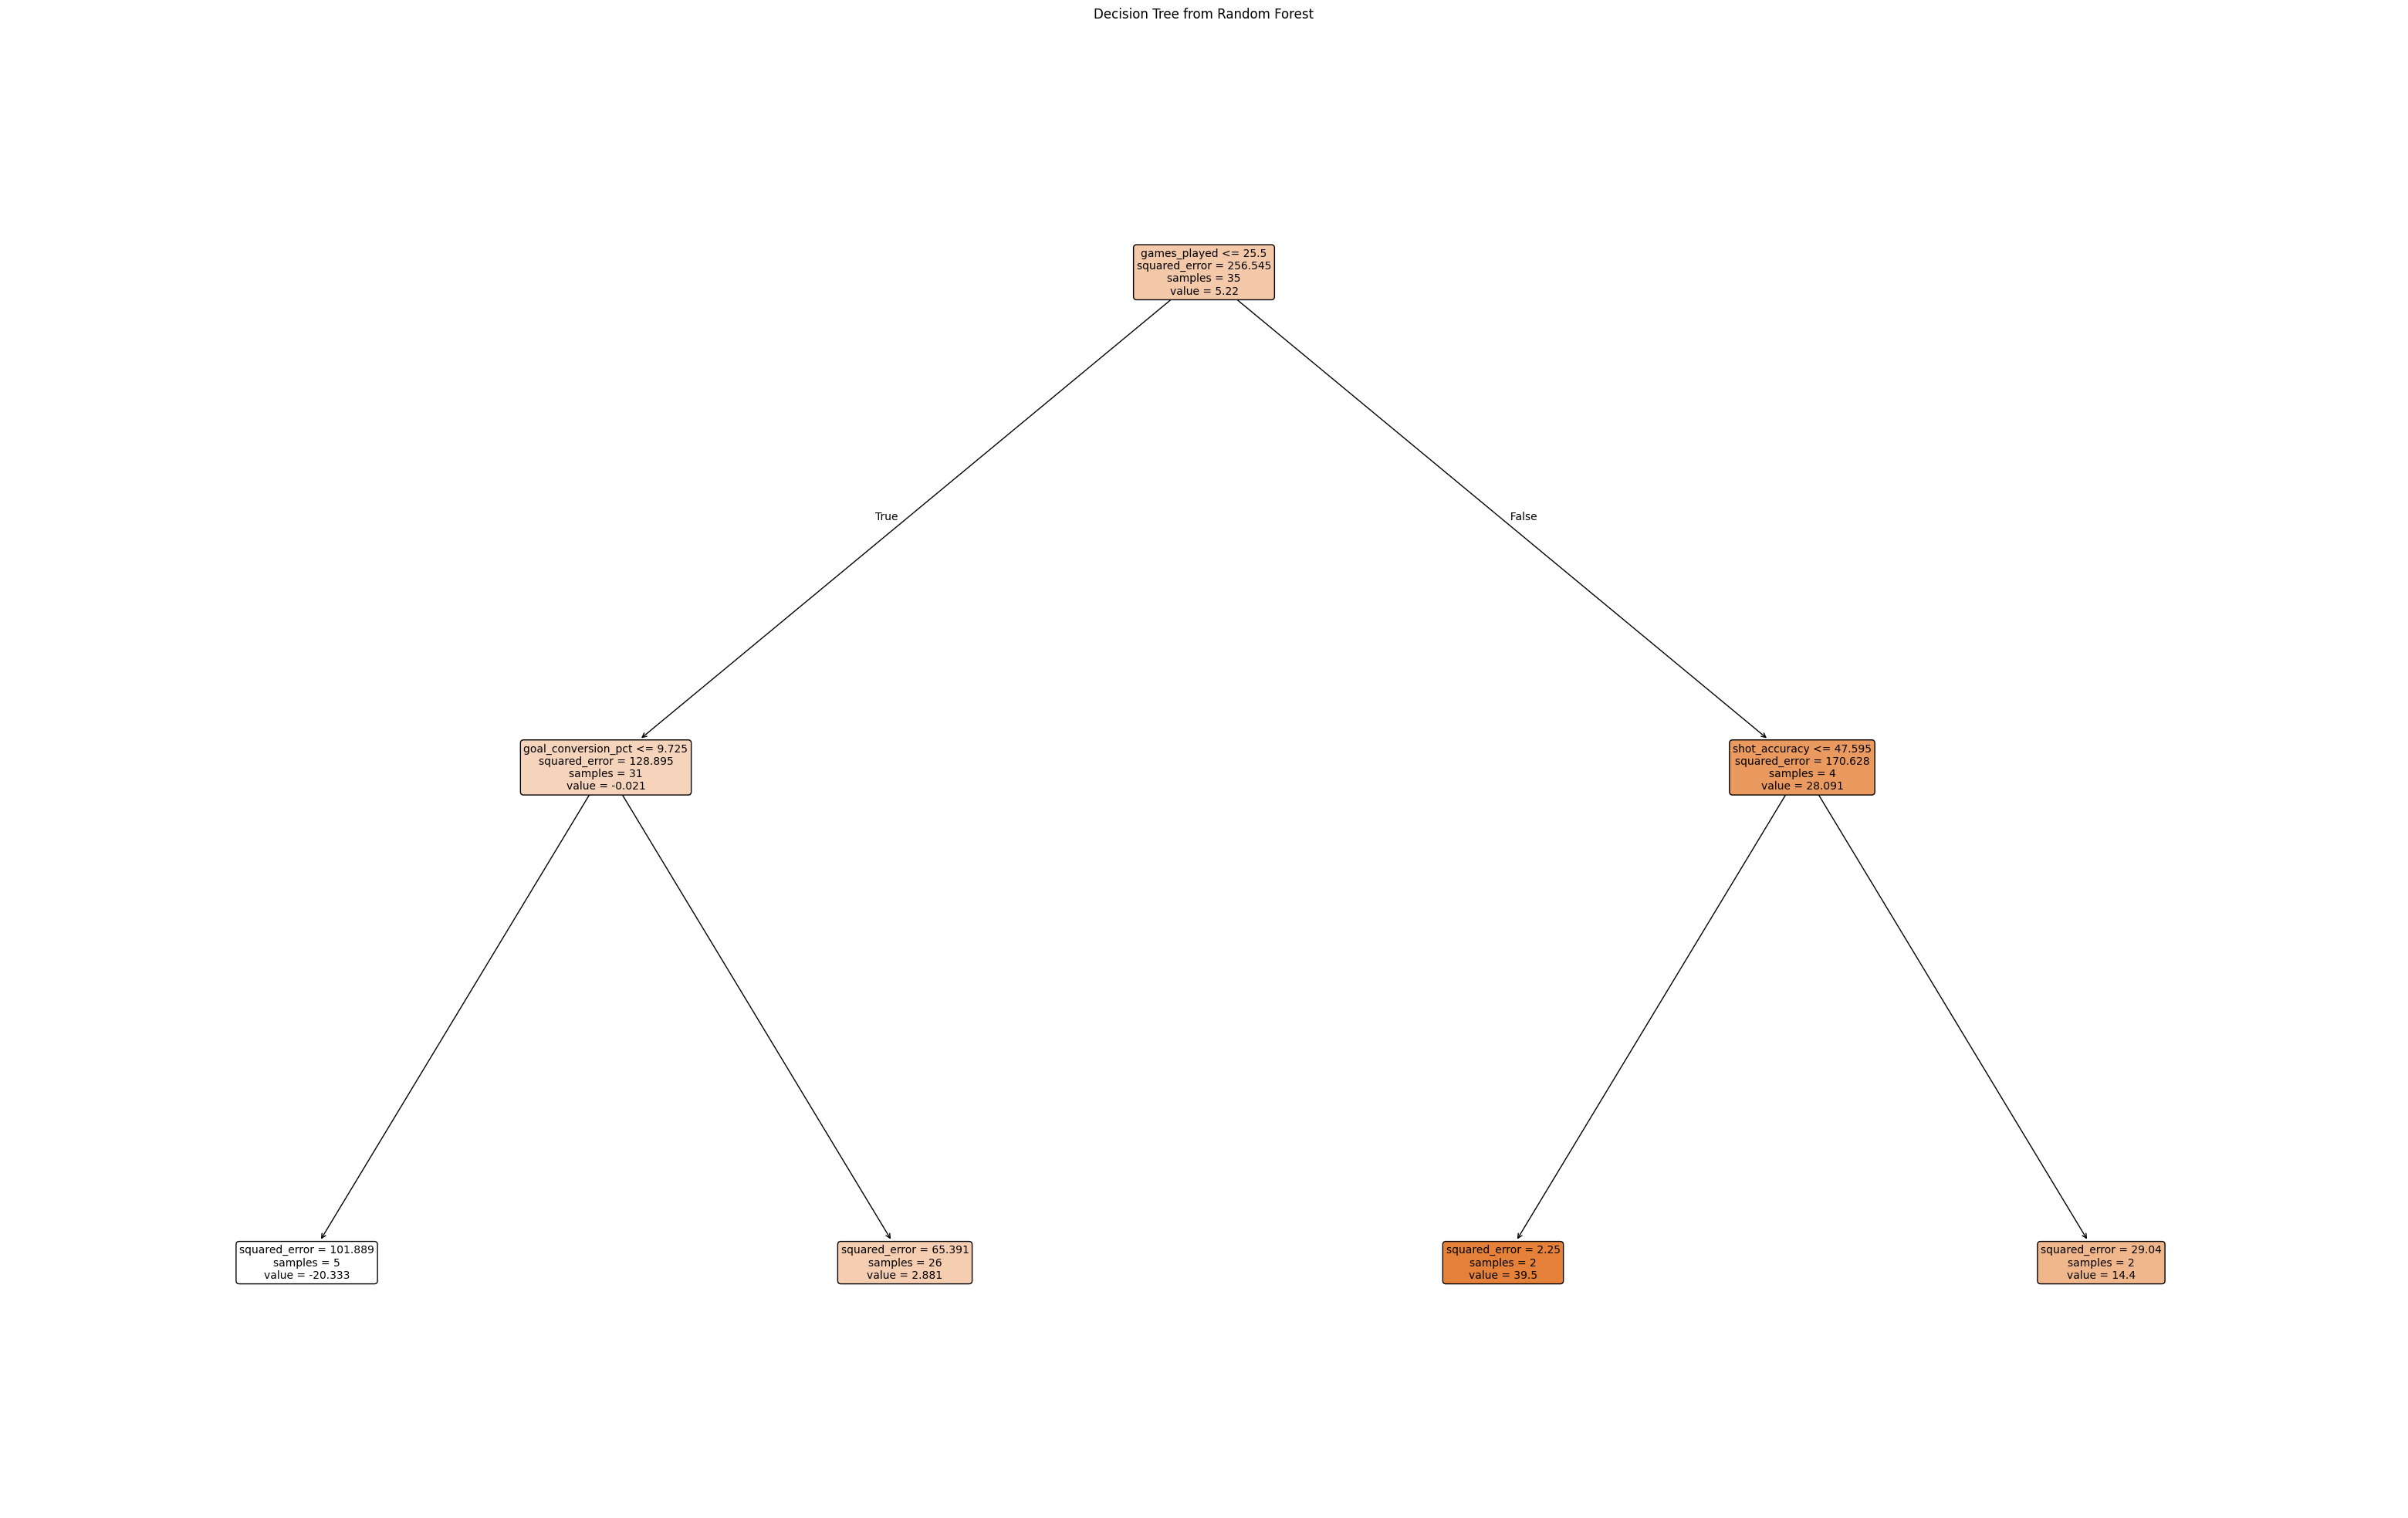

In [39]:
X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]


plt.figure(figsize=(40, 25))
plot_tree(tree_to_plot, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

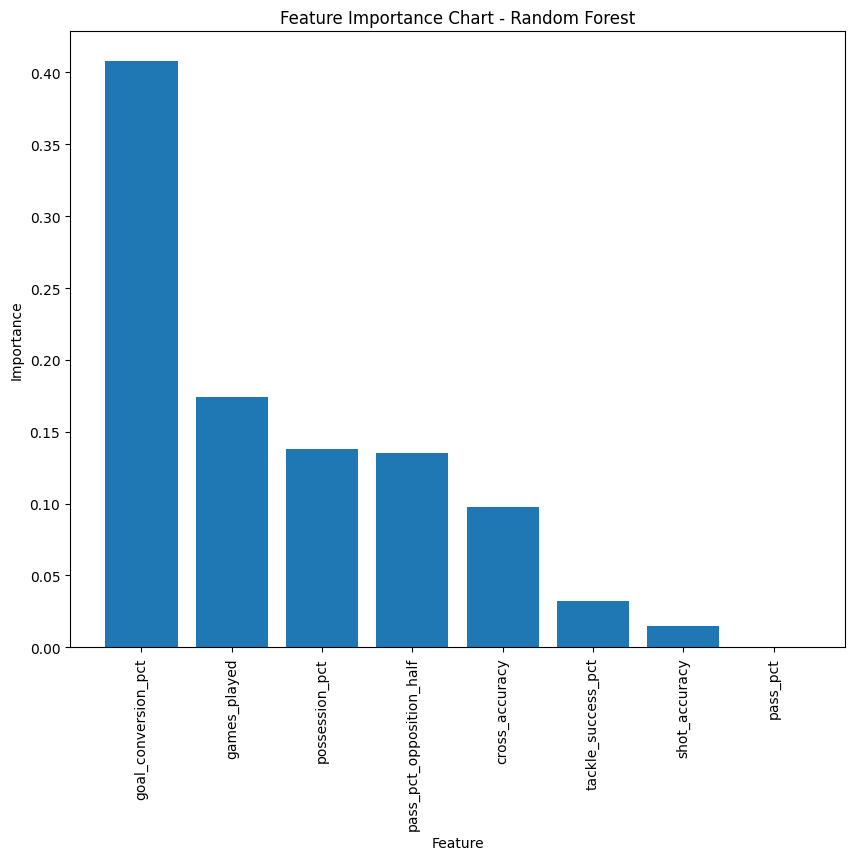

In [40]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.bar(importances['Feature'], importances['Importance'] )
plt.title("Feature Importance Chart - Random Forest")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(importances['Feature'], rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Principal Component Analysis

Using PCA to see if a smaller amount of features can narrow the gab between train and test MSE.

Re-stating X and y variables and scaling the X features:

In [41]:
X = x_soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct', 'pass_pct', \
'pass_pct_opposition_half', 'possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = y_soccer_data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data_df.head()

,games_played,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
0,-2.044519,0.645329,-1.288709,-1.711369,-1.493046,-0.967695,-0.913756,1.155485
1,0.231455,-0.047877,-0.146000,-0.205826,-0.590056,-0.648734,-0.956748,0.696902
2,-1.475526,-0.978330,-0.340933,-1.720139,-1.523484,-1.286656,0.510028,1.960629
3,0.800449,-1.019107,0.099346,-1.170543,-0.564691,-0.967695,0.767979,0.440189
4,0.800449,0.789902,0.290918,-0.468931,0.203865,0.308149,-0.223360,0.052786


Applying PCA and looking for 90% of the variance explained (n_components = .90):

In [42]:
pca = PCA(n_components=.80,random_state=42)
pca_data = pca.fit_transform(scaled_data)

Creating a Scree Plot of the PCs that account for 90% of the variance:

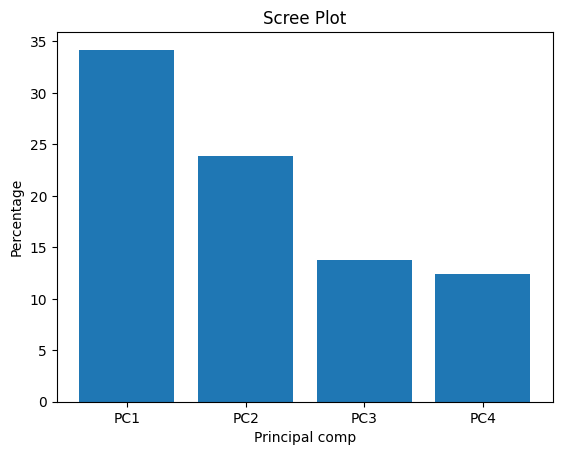

In [43]:
pca.explained_variance_ratio_

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage')
plt.xlabel('Principal comp')
plt.title('Scree Plot')

plt.show()

Creating more graphs displaying PCA:

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [80.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


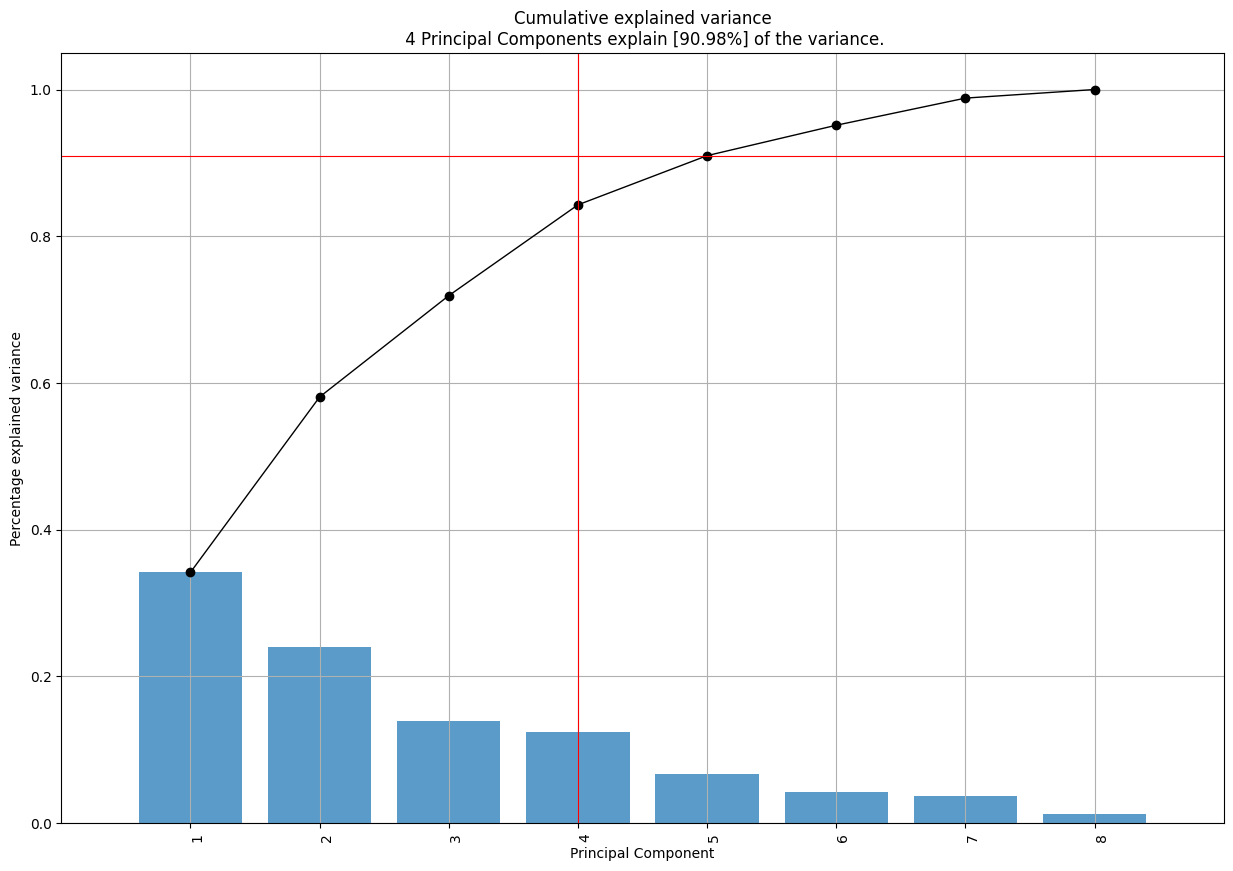

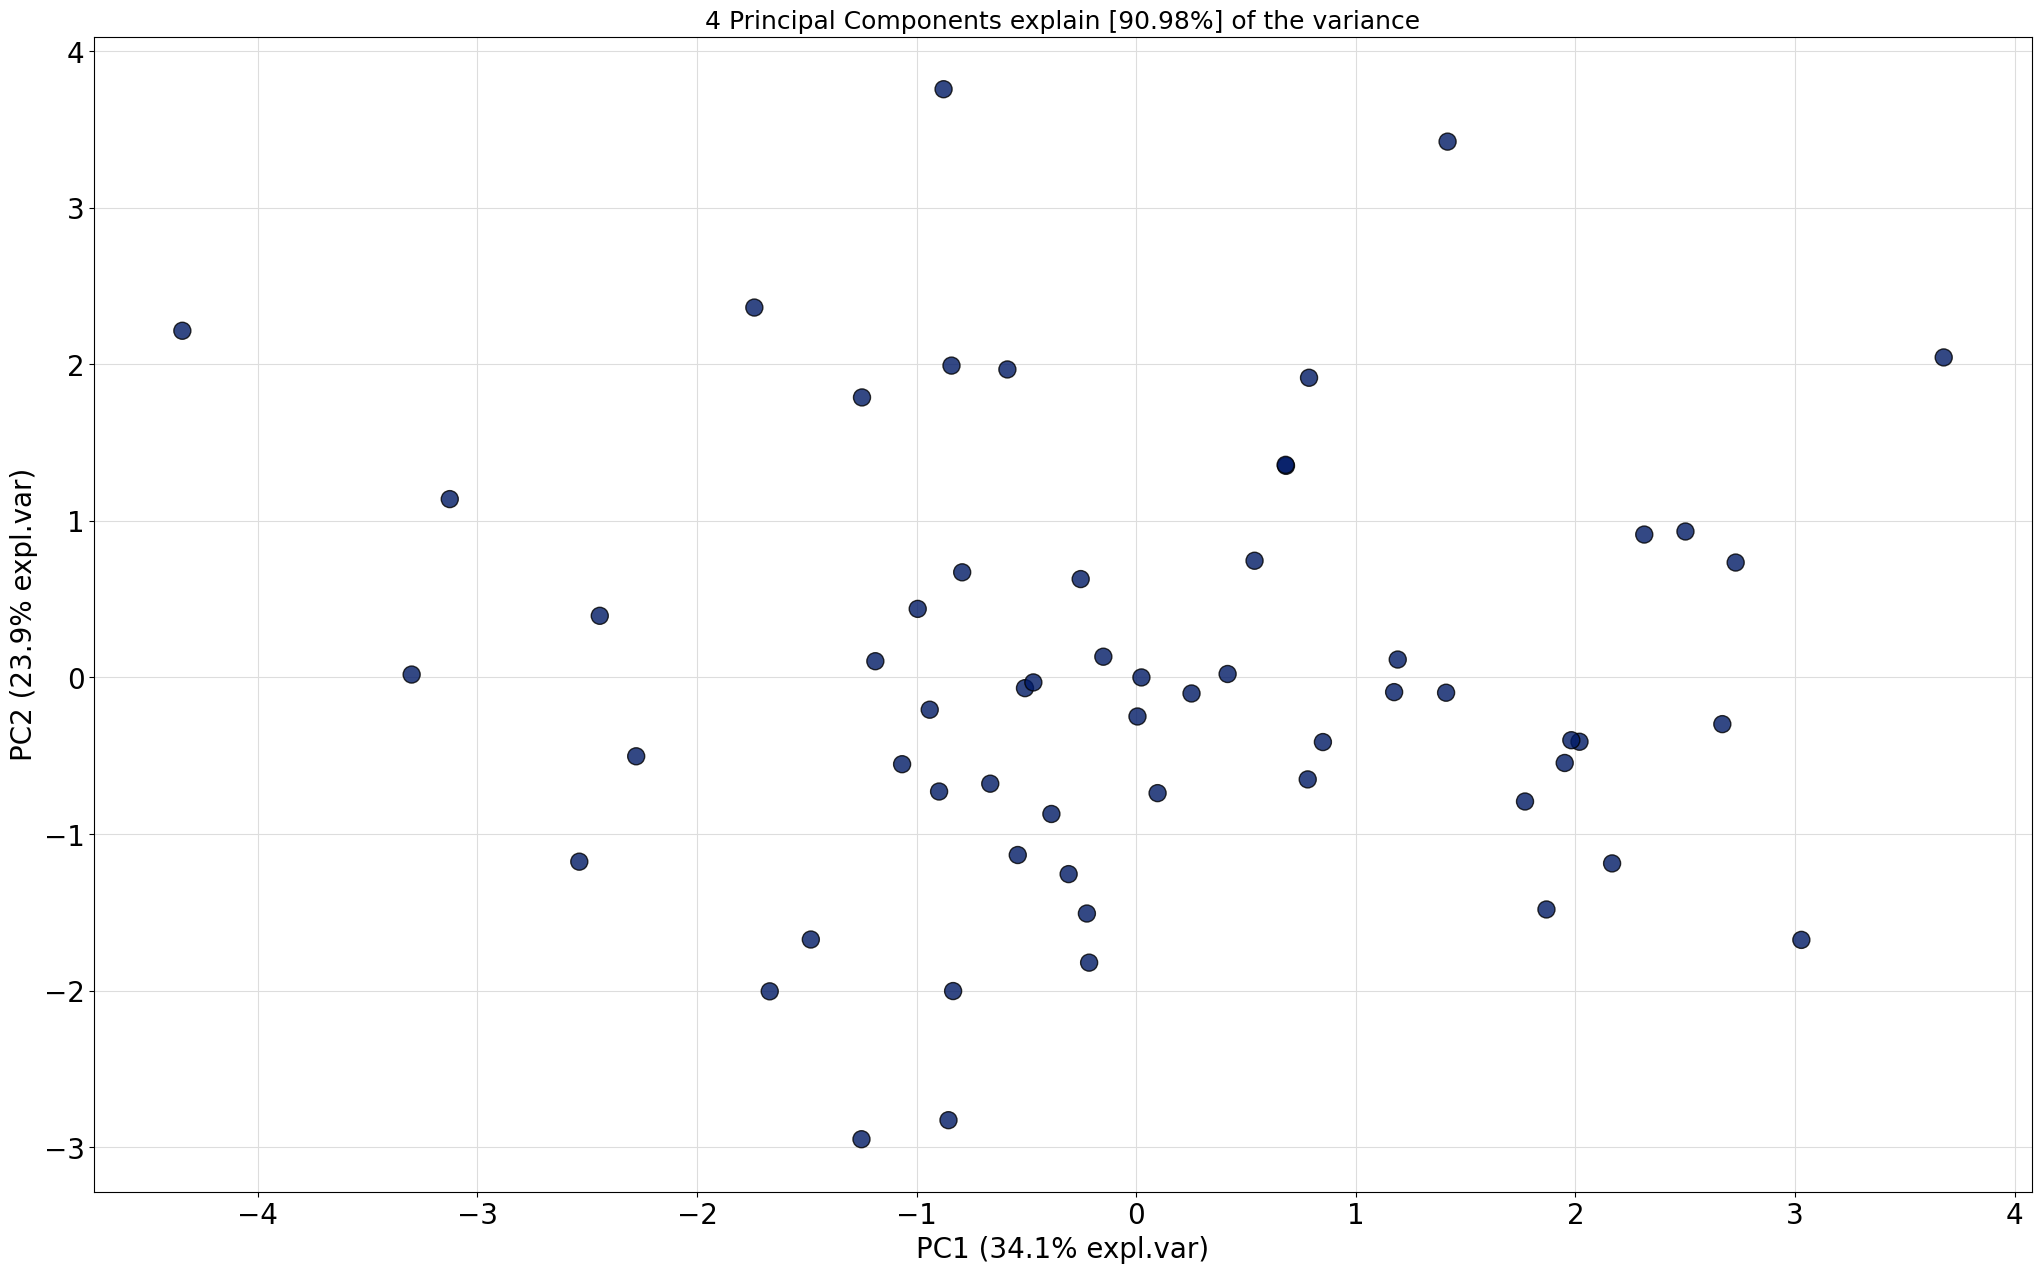

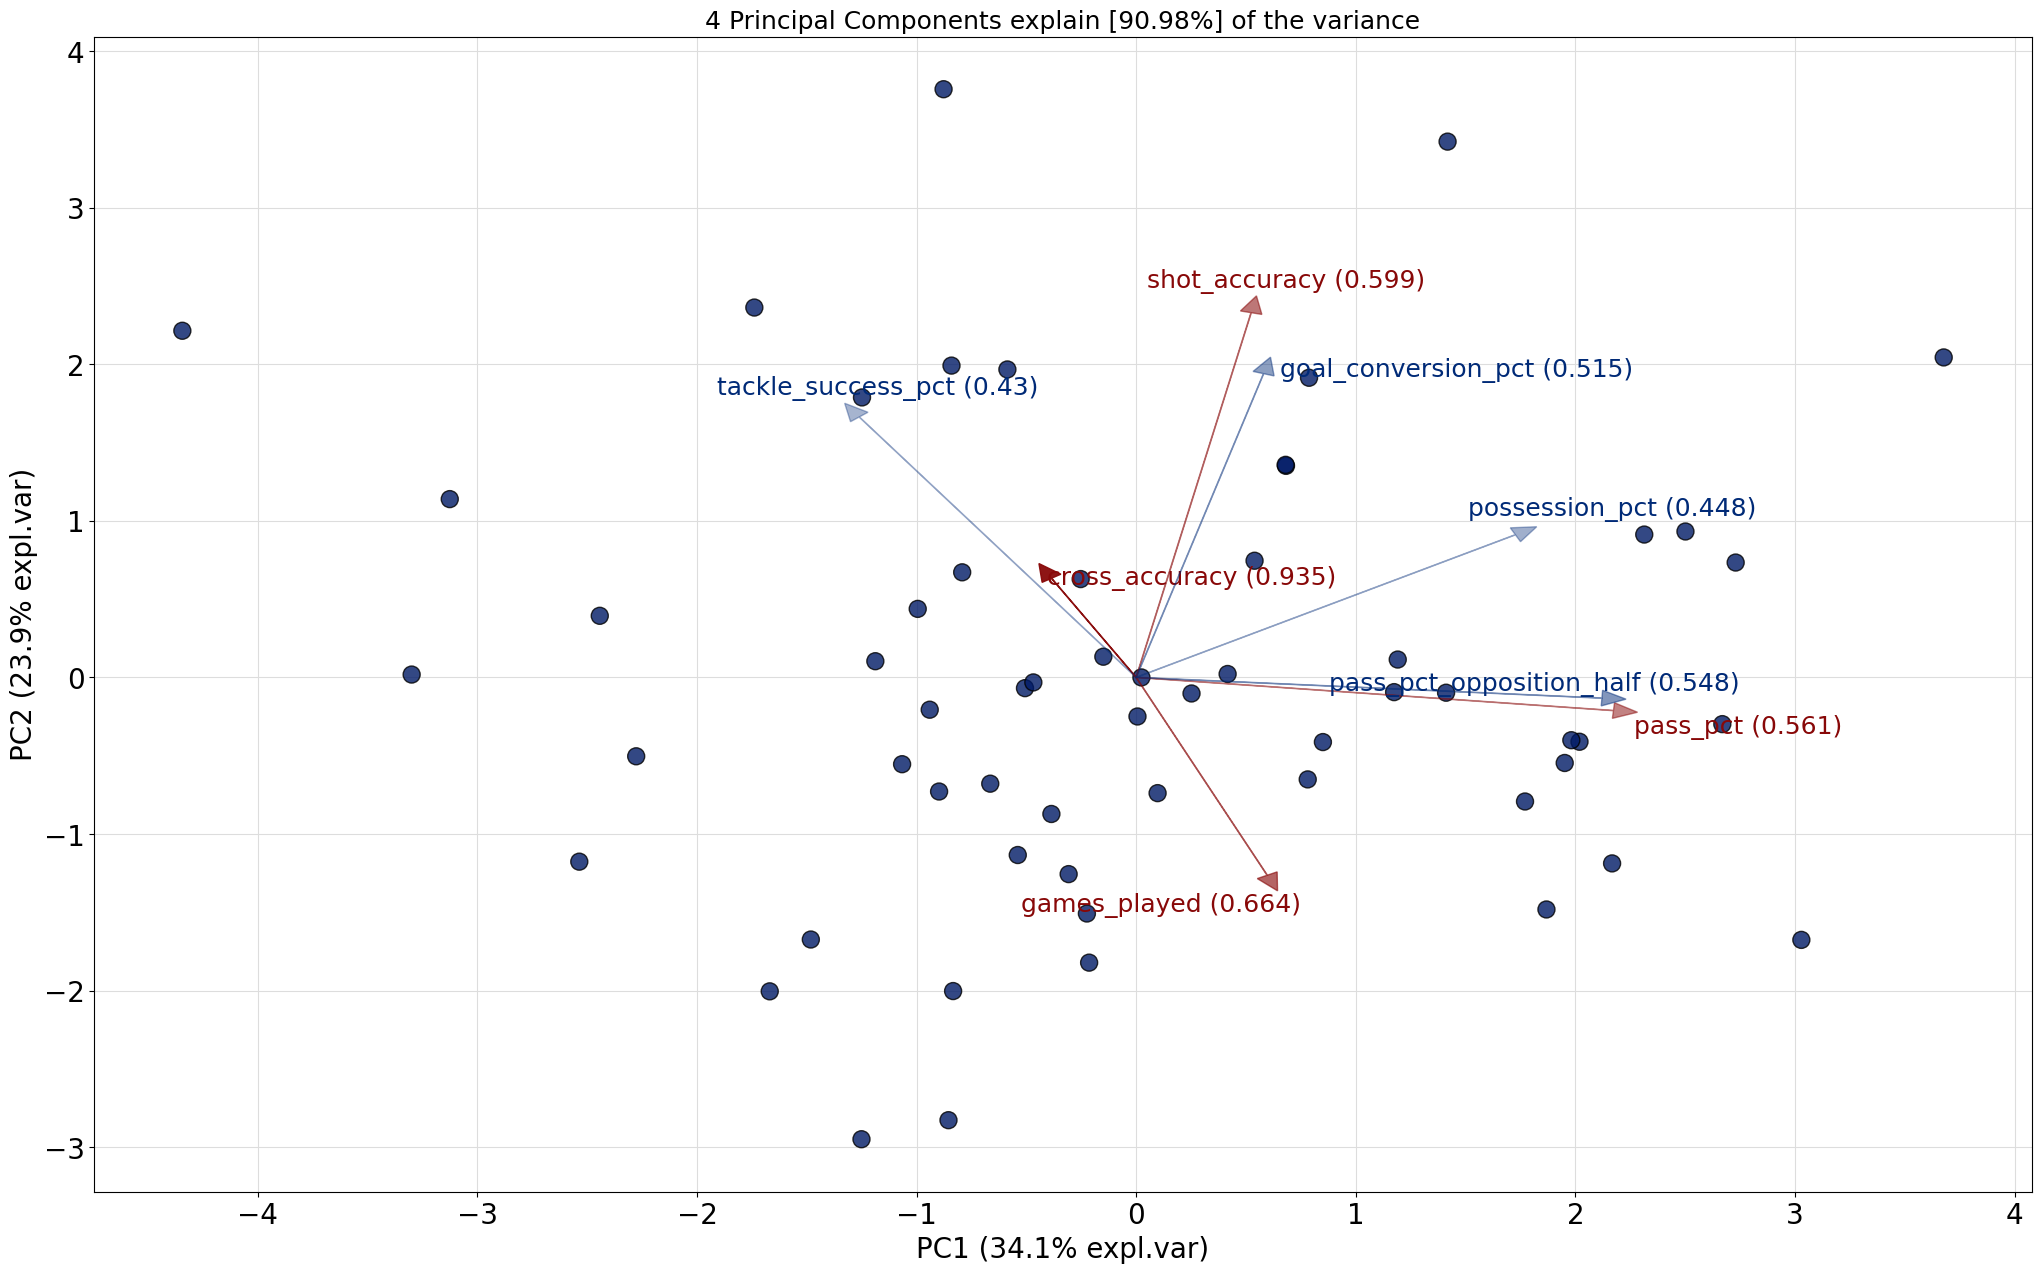

In [44]:
from pca import pca

scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA
model = pca(n_components=0.8)

# Fit and transform
results = model.fit_transform(X=scaled_data_df)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot()

Creating a data frame of the 4 PCs that account for 90% of the variance:

In [45]:
pca_df = pd.DataFrame(pca_data)

pca_df

,0,1,2,3
0,-3.299368,0.018155,-1.766622,0.130626
1,-1.065873,-0.554368,-0.079226,0.044649
2,-3.125800,1.138610,-0.690204,-1.550228
3,-1.187709,0.103420,1.240969,-1.022356
4,0.023972,-0.000238,0.591931,1.025205
5,0.252146,-0.102675,1.290449,0.203651
6,-1.481518,-1.673981,2.359496,-0.405244
7,2.313915,0.912251,0.082069,-0.297650
8,-2.442676,0.393348,-2.359520,0.232941
9,-0.386007,-0.872319,-0.139214,0.128036


### Linear Regression - PCA

Performing linear regression again but with the PCA data:

In [46]:
X = pca_df
y = y_soccer_data

linear_regression.fit(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()
reg = linear_regression.fit(X_train, y_train)

y_test_pred = linear_regression.predict(X_test)
y_train_pred = linear_regression.predict(X_train)

In [47]:
for col in pca_df.columns:
    X = pca_df
    y = y_soccer_data
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    linear_regression = LinearRegression()
    reg = linear_regression.fit(X_train,y_train)
    
    y_pred = linear_regression.predict(X_test)
    y_train_pred = linear_regression.predict(X_train)
    
    MSE_test = mean_squared_error(y_test,y_pred)
    MSE_train = mean_squared_error(y_train,y_train_pred)
    
    
    print(f'Feature: {col} \n Slope: {reg.coef_[col]}\n')
print(f'Intercept: {reg.intercept_}')

Feature: 0 
 Slope: 3.075553762964335

Feature: 1 
 Slope: 3.7619854415126275

Feature: 2 
 Slope: 4.515514034026799

Feature: 3 
 Slope: 4.965233943838386

Intercept: -0.15721666910229298


Finding the Testing and Training MSE:

In [48]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

print(f'Training MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

Training MSE: 106.29153344848993
Test MSE: 72.95560629326467


Finding the Training and Testing R Squared values:

In [49]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print(f'Training R Squared: {r2_train}')
print(f'Test R Squared: {r2_test}')

Training R Squared: 0.43808872581053204
Test R Squared: 0.793955178648869


### SVR - PCA

Performing SVR with the PCA data:

In [50]:
scaler = StandardScaler()
X_train_scaled_PCA = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled_PCA = pd.DataFrame(scaler.transform(
    X_test), columns=X_train.columns, index=X_test.index)

In [51]:
model = SVR(kernel = 'rbf', C=1, gamma=1)
model.fit(X_train_scaled_PCA, y_train)


y_test_pred_SVR = model.predict(X_test_scaled_PCA)
y_train_pred_SVR = model.predict(X_train_scaled_PCA)

Finding the MSE for the training and testing data:

In [52]:
mse_test_SVR = mean_squared_error(y_test, y_test_pred_SVR)
mse_train_SVR = mean_squared_error(y_train, y_train_pred_SVR)

print(f'Training MSE SVR: {mse_train_SVR}')
print(f'Test MSE SVR: {mse_test_SVR}')

Training MSE SVR: 160.46508251074752
Test MSE SVR: 338.1797575467608


Finding the R Squared value for the training and testing data:

In [53]:
r2_train_SVR = r2_score(y_train,y_train_pred_SVR)
r2_test_SVR = r2_score(y_test,y_test_pred_SVR)

print(f'Training R Squared SVR: {r2_train_SVR}')
print(f'Test R Squared SVR: {r2_test_SVR}')

Training R Squared SVR: 0.15169970691759516
Test R Squared SVR: 0.04489605023371501


### SVR with GridSearch - PCA

Using a grid search to find the best C and gamma parameters:

In [54]:
folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVR()

params = {'C': [0.1, 1, 10, 100, 1000, 10000, 20000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='neg_mean_squared_error', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled_PCA, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)

print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Fitting 5 folds for each of 35 candidates, totalling 175 fits


Negative MSE: -121.4755289351402
Best Parameters: {'C': 20000, 'gamma': 0.001}


Performing SVR with the optimal gamma and C parameters:

In [55]:
model_scaled = SVR(gamma=0.001, C=2000)
model_scaled.fit(X_train_scaled_PCA, y_train)

y_train_pred_SVR = model_scaled.predict(X_train_scaled_PCA)
y_test_pred_SVR = model_scaled.predict(X_test_scaled_PCA)

Finding the MSE for the training and testing data:

In [56]:
mse_test_SVR = mean_squared_error(y_test, y_test_pred_SVR)
mse_train_SVR = mean_squared_error(y_train, y_train_pred_SVR)

print(f'Training MSE SVR: {mse_train_SVR}')
print(f'Test MSE SVR: {mse_test_SVR}')

Training MSE SVR: 111.06981553009075
Test MSE SVR: 90.8089157683958


Finding the R Squared value for the training and testing data:

In [57]:
r2_train_SVR = r2_score(y_train,y_train_pred_SVR)
r2_test_SVR = r2_score(y_test,y_test_pred_SVR)

print(f'Training R Squared SVR: {r2_train_SVR}')
print(f'Test R Squared SVR: {r2_test_SVR}')

Training R Squared SVR: 0.4128282889177838
Test R Squared SVR: 0.7435329815315865


## SVC

Binning the goal differential so be categorical and performing SVC. Goal: predict if a team will have a positive or negative goal differential.

Binning the soccer data:

In [58]:
soccer_data['differential'] = pd.cut(soccer_data["goal_differential"], bins=[-34,0,45], labels = ["negative", "positive"])
soccer_data.head()

,team_name,season,games_played,goal_differential,goals,goals_conceded,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct,differential
0,Boston Breakers,2016,20,-33,14,47,25.57,8.97,67.38,57.86,47,42.95,77.42,negative
1,Boston Breakers,2017,24,-11,24,35,23.70,12.37,72.53,61.42,48,42.78,73.49,negative
2,Chicago Red Stars,2016,21,3,25,22,21.19,11.79,67.35,57.74,46,48.58,84.32,positive
3,Chicago Red Stars,2017,25,2,33,31,21.08,13.10,69.23,61.52,47,49.60,71.29,positive
4,Chicago Red Stars,2018,25,8,38,30,25.96,13.67,71.63,64.55,51,45.68,67.97,positive


Creating a X and y variable dataframe:

In [59]:
X = soccer_data[['games_played', 'cross_accuracy', 'goal_conversion_pct',
       'pass_pct', 'pass_pct_opposition_half','possession_pct', 'shot_accuracy', 'tackle_success_pct']]

y = soccer_data["differential"]

Train test split:

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train.head()

,games_played,cross_accuracy,goal_conversion_pct,pass_pct,pass_pct_opposition_half,possession_pct,shot_accuracy,tackle_success_pct
36,25,25.15,15.75,69.99,61.75,50,45.28,63.11
31,24,24.56,13.50,74.67,63.93,49,48.50,62.39
8,20,25.63,9.33,71.52,59.66,48,43.01,83.55
17,24,23.64,16.09,74.54,65.06,51,54.02,73.08
6,27,22.22,12.26,68.67,60.24,44,45.98,59.82


Scaling the X data using Standard Scaler:

In [61]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(
    X_test), columns=X_train.columns, index=X_test.index)

print(X_train_scaled.head())

    games_played  cross_accuracy  goal_conversion_pct  pass_pct  \
36      0.888550        0.601339             0.945268 -1.196477   
31      0.308524        0.352568             0.175974  0.288553   
8      -2.011579        0.803729            -1.249784 -0.710986   
17      0.308524       -0.035346             1.061516  0.247303   
6       2.048602       -0.634084            -0.247993 -1.615332   

    pass_pct_opposition_half  possession_pct  shot_accuracy  \
36                 -0.674791       -0.148828      -0.364404   
31                 -0.099303       -0.481918       0.411358   
8                  -1.226520       -0.815009      -0.911292   
17                  0.199000        0.184263       1.741235   
6                  -1.073409       -2.147371      -0.195760   

    tackle_success_pct  
36           -0.498904  
31           -0.580468  
8             1.816606  
17            0.630530  
6            -0.871606  


Using logistic regression now that y data is categorical:

In [62]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Calculating accuracy and f1 score:

In [63]:
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

print(f'Training accuracy: {metrics.accuracy_score(y_train, y_pred_train)}')
print(f'Testing accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Training F1 score: {metrics.f1_score(y_train, y_pred_train, average='macro')}')
print(f'Testing F1 score: {metrics.f1_score(y_test, y_pred, average='macro')}')

Training accuracy: 0.851063829787234
Testing accuracy: 0.8333333333333334
Training F1 score: 0.8485964104924069
Testing F1 score: 0.8285714285714285


Fitting SVC:

In [64]:
model = SVC(kernel = 'rbf', C=1, gamma=1)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

Calculating accuracy and F1 score:

In [65]:
print(f'Training accuracy: {metrics.accuracy_score(y_train, y_pred_train)}')
print(f'Testing accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Training F1 score: {metrics.f1_score(y_train, y_pred_train, average='macro')}')
print(f'Testing F1 score: {metrics.f1_score(y_test, y_pred, average='macro')}')

Training accuracy: 1.0
Testing accuracy: 0.5
Training F1 score: 1.0
Testing F1 score: 0.4375


Using grid search to find optimal C and gamma:

In [66]:
folds = KFold(n_splits=5, shuffle=True, random_state=7)
model = SVC()

params = {'C': [0.1, 1, 10, 100, 1000, 2000],
          'gamma': [1, 0.1, 0.01]}

c_opt = GridSearchCV(estimator=model, param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(X_train_scaled, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [67]:
print(f'Negative MSE: {c_opt.best_score_}')
print(f'Best Parameters: {c_opt.best_params_}')

Negative MSE: 0.817978687978688
Best Parameters: {'C': 1, 'gamma': 0.1}


Using optimal C and gamma to perform SVC:

In [68]:
model_scaled = SVC(gamma=0.1, C=1)
model_scaled.fit(X_train_scaled, y_train)
y_pred_train = model_scaled.predict(X_train_scaled)
y_pred = model_scaled.predict(X_test_scaled)


print(f'Training accuracy: {metrics.accuracy_score(y_train, y_pred_train)}')
print(f'Testing accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Training F1 score: {metrics.f1_score(y_train, y_pred_train, average='macro')}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred, average='macro')}')

Training accuracy: 0.9574468085106383
Testing accuracy: 0.8333333333333334
Training F1 score: 0.9569597069597069
F1 score: 0.8333333333333334


Creating a confusion matrix:

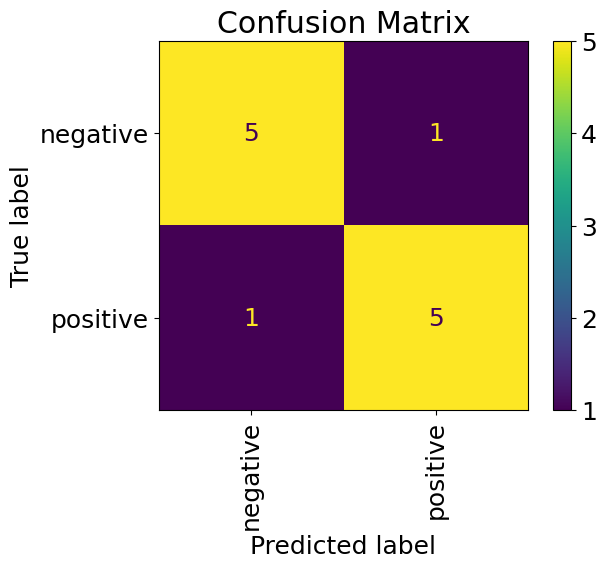

In [70]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()